# Final Project of Harta, Tahta, Data

## Dataset Description

The data is related with telephonic marketing campaigns of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe a term deposit (variable y).

Source: <a href="https://www.kaggle.com/prakharrathi25/banking-dataset-marketing-targets?select=test.csv">Bank Marketing Data Set</a>

| Columns | Description | Type | Remarks |
| :- | :- | :- | :- |
| age | numeric | bank client data | |
| job | type of job | bank client data | |
| marital | marital status | bank client data | |
| education | education tier | bank client data | |
| default | has credit in default? | bank client data | |
| balance | average yearly balance, in euros | bank client data | |
| housing | has housing loan? | bank client data | |
| loan | has personal loan? | bank client data | |
| contact | contact communication type | related with last contact of the current campaign | |
| day | last contact day of the month | related with last contact of the current campaign | |
| month | last contact month of year | related with last contact of the current campaign | |
| duration | last contact duration, in seconds | related with last contact of the current campaign | |
| campaign | number of contacts performed during this campaign and for this client | others | |
| pdays | number of days that passed by after the client was last contacted from a previous campaign | others | -1 means client was not previously contacted | |
| previous | number of contacts performed before this campaign and for this client | others | | 
| poutcome | outcome of the previous marketing campaign | others | |
| y | has the target subscribed a term deposit? | target variable | |

## Objective

Create a model which predicts whether the client subscribe to term deposit

### Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import MinMaxScaler, StandardScaler # standarization, normalization

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() #label encoding

from imblearn import under_sampling, over_sampling #handling imbalance data

pd.set_option('display.max_columns', None)

### Loading Dataset

In [3]:
df = pd.read_excel('train.xlsx')

### Dataset Exploration

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
print(f"Rows, Cols: {df.shape[0], df.shape[1]}")
df.info()

Rows, Cols: (45211, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


- This dataset contains 45k (45.211) rows and 17 columns. Amongst the columns, we have the target variable which is named 'y'.
- This dataset is a mix of numerical and categorical variables.
- The target variable is in categorical data type, this will be converted before the data preprocessing stage.

### Descriptive Statistics

#### Numerical Columns

In [7]:
num_cols = list(df.select_dtypes("number").columns)
print(num_cols)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [8]:
df.select_dtypes("number").describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Generally, we can see the distribution shape according to the difference of mean and median values. It seems that column `Age` has normal distribution, while the rest of the columns is apparently skewed.

#### Categorical Columns

In [9]:
cat_cols = list(df.select_dtypes(object).columns)
print(cat_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [10]:
df.select_dtypes(object).describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


Most of the categorical columns contain low cardinality (less unique value), except for `job` and `month`. 

In [11]:
for col in cat_cols:
    print(f'''Value count on column {col}:''')
    print(df[col].value_counts())
    print('---'*10, '\n')

Value count on column job:
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
------------------------------ 

Value count on column marital:
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
------------------------------ 

Value count on column education:
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
------------------------------ 

Value count on column default:
no     44396
yes      815
Name: default, dtype: int64
------------------------------ 

Value count on column housing:
yes    25130
no     20081
Name: housing, dtype: int64
------------------------------ 

Value count on column loan:
no     37967
yes     7244
Name: loan, dtype: int64
-------------------

It appears many categorical column contain 'unknown' value; they are `job`, `education`, `contact`, and `poutcome` 

## Data Cleaning

### Missing Values

In [12]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

This dataset doesn't contain any missing values on all columns

### Duplicated Values

In [13]:
df.duplicated().any()

False

This dataset doesn't contain any duplicated values on all columns

## Exploratory Data Analysis

### Numerical Features

In [14]:
num_cols = list(df.select_dtypes("number").columns)
print("Numerical Features Length",len(num_cols), ":", num_cols)

Numerical Features Length 7 : ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


There are 7 numerical features in the dataset

### Univariate Analysis

### Dist Plot

In [15]:
num_cols_skewness = df[num_cols].skew()

If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

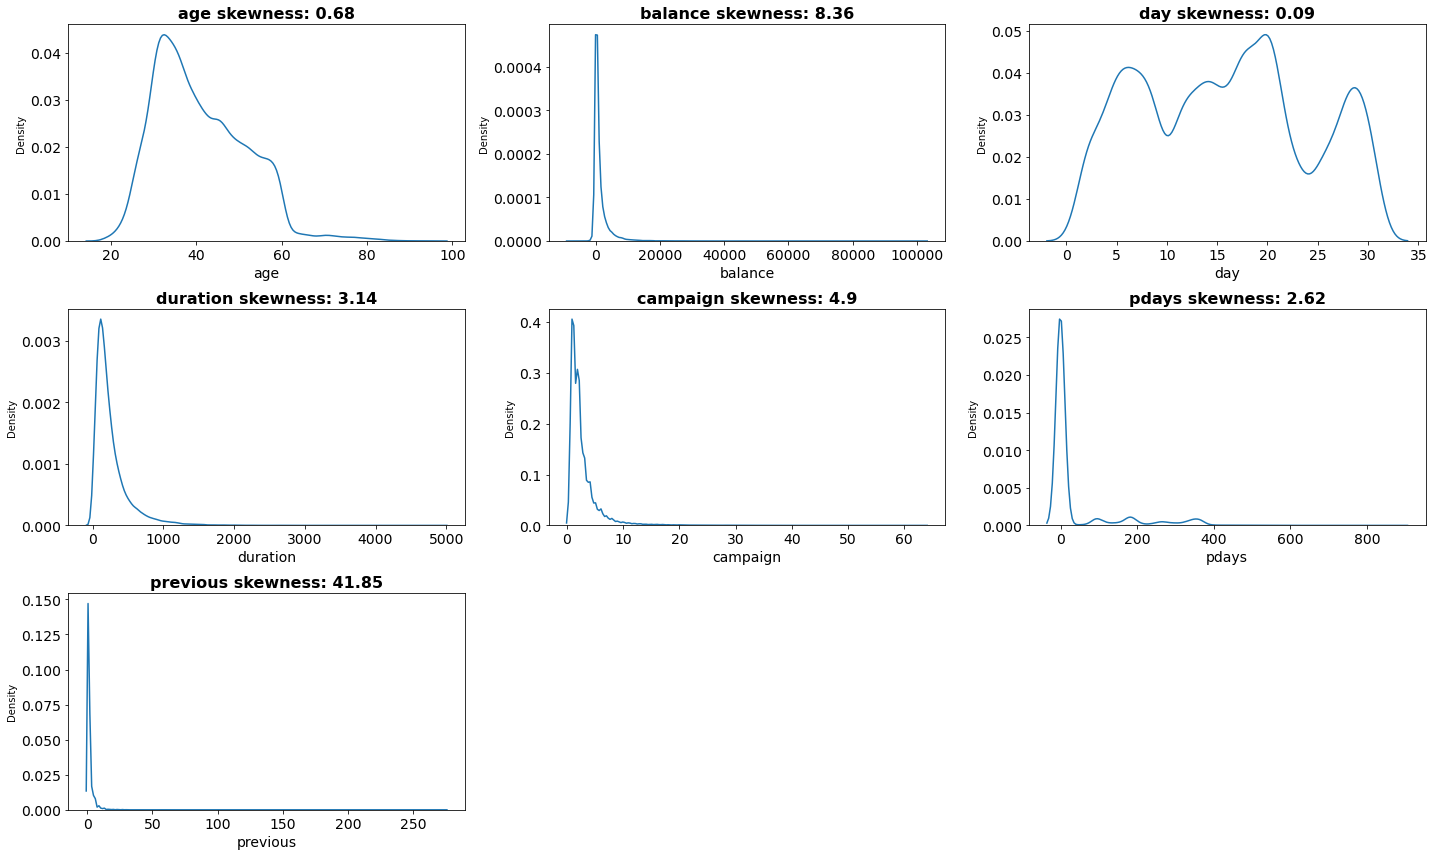

In [16]:
plt.figure(figsize=(20, 12))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//2, 3, i+1)
    ax = sns.kdeplot(
        df[num_cols[i]]
    )
    ax.set_xlabel(str(num_cols[i]), fontsize = 14)
    ax.tick_params(labelsize=14)
    ax.set_title(str(num_cols[i]) + ' skewness: ' + str(round(num_cols_skewness[i], 2)), fontsize=16, fontweight='heavy')
plt.tight_layout()
plt.show()

- Features that are moderately skewed : `age`
- Features that are heavily skewed : `balance`, `duration`, `campaign`, `pdays`, `previous`
- Numerical features that has more than 1 mode are called **multimodal**. In this dataset, `day` feature appears to be multimodal

### Box Plot

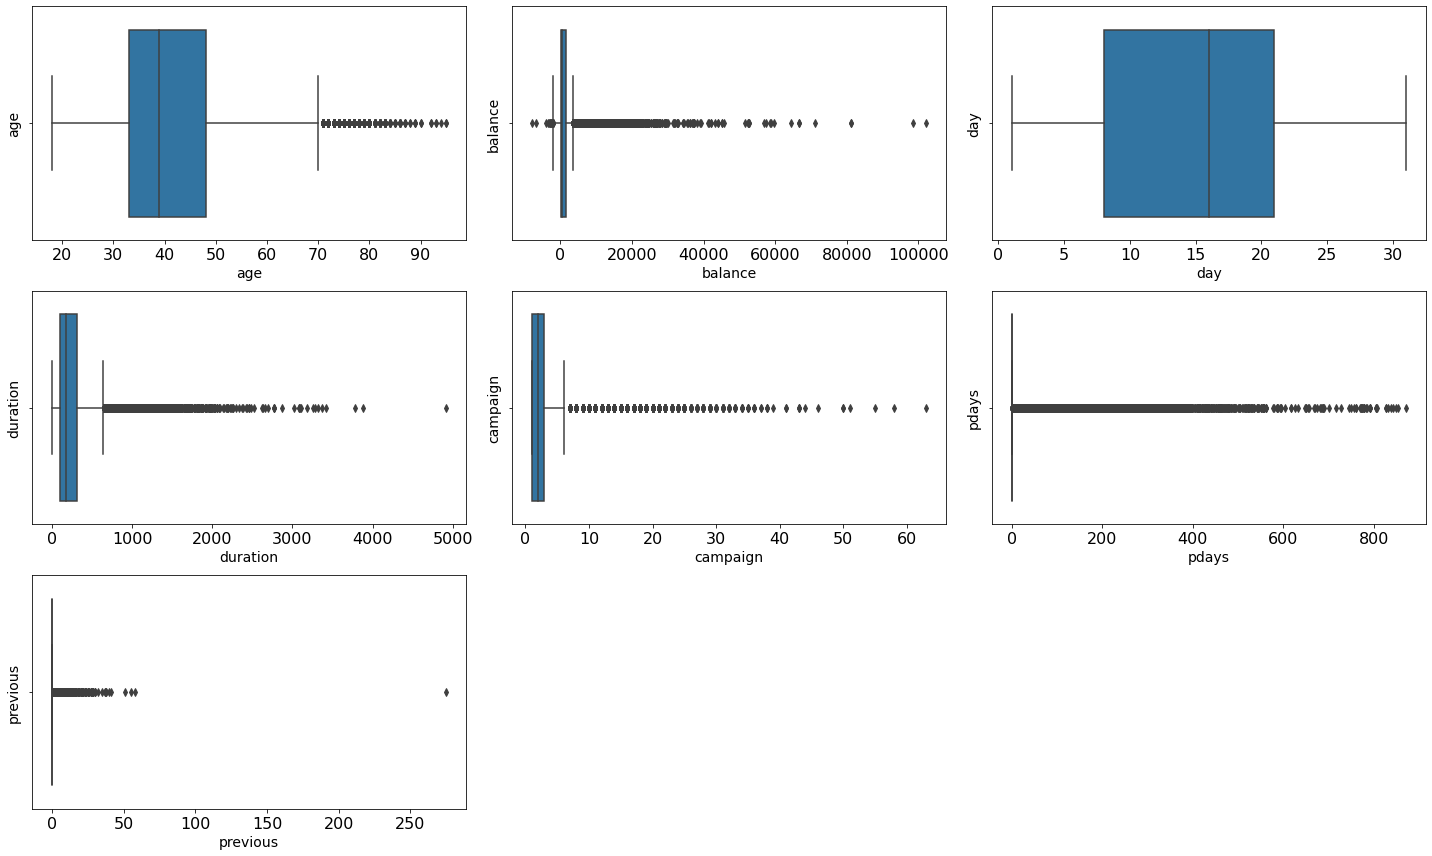

In [17]:
plt.figure(figsize=(20, 12))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//2, 3, i+1)
    ax = sns.boxplot(
        x = df[num_cols[i]]
    )
    ax.set_xlabel(str(num_cols[i]), fontsize = 14)
    ax.set_ylabel(str(num_cols[i]), fontsize = 14)
    ax.tick_params(labelsize=16)
plt.tight_layout()
plt.show()

- All features contain outliers except for feature `month`

### Bivariate Analysis

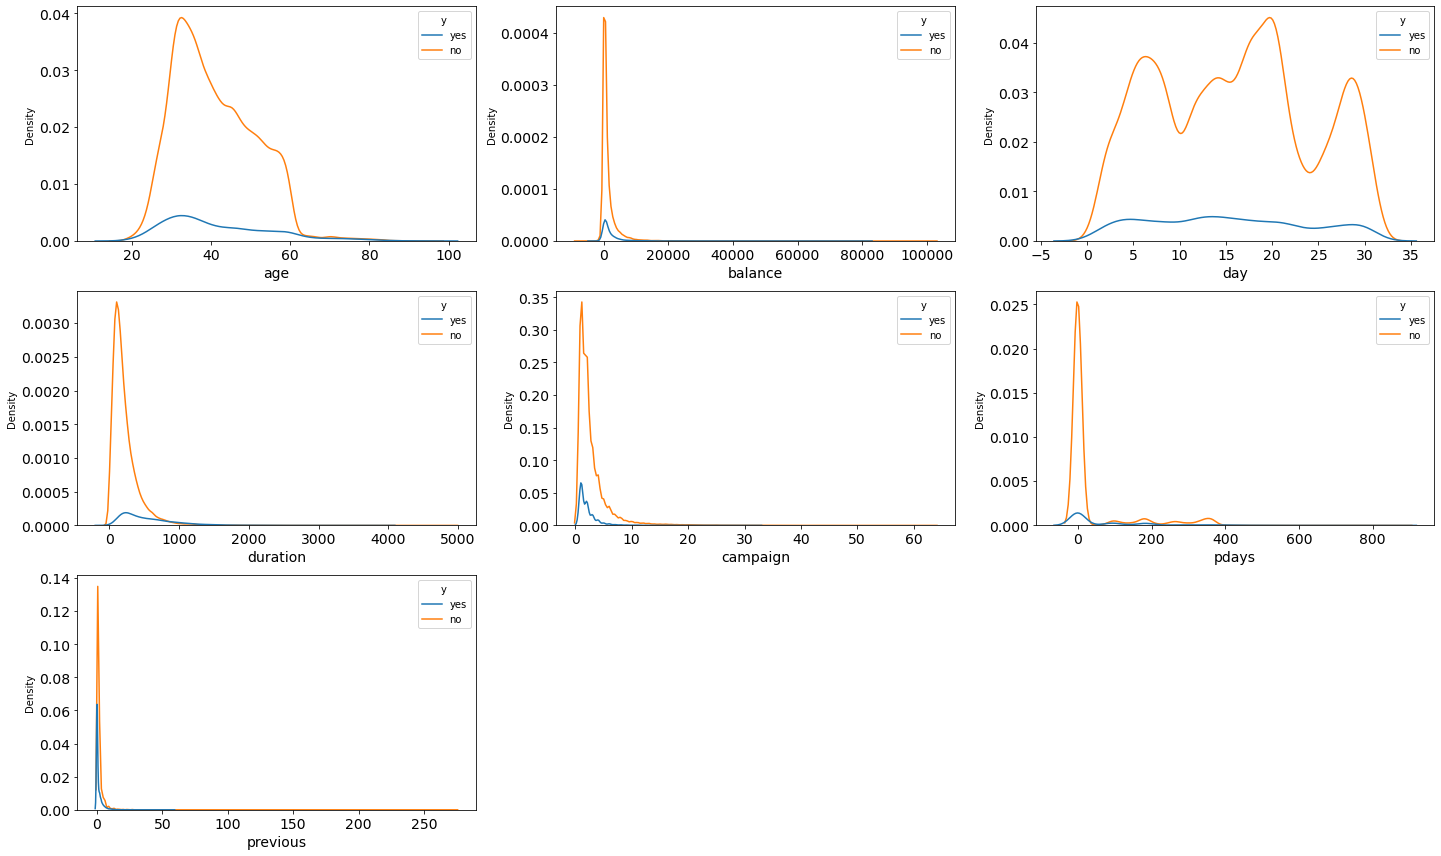

In [18]:
plt.figure(figsize=(20, 12))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//2, 3, i+1)
    ax = sns.kdeplot(
        x = df[num_cols[i]],
        hue_order = ["yes", "no"],
        hue = df["y"]
    )
    ax.set_xlabel(str(num_cols[i]), fontsize = 14)
    ax.tick_params(labelsize=14)
plt.tight_layout()
plt.show()

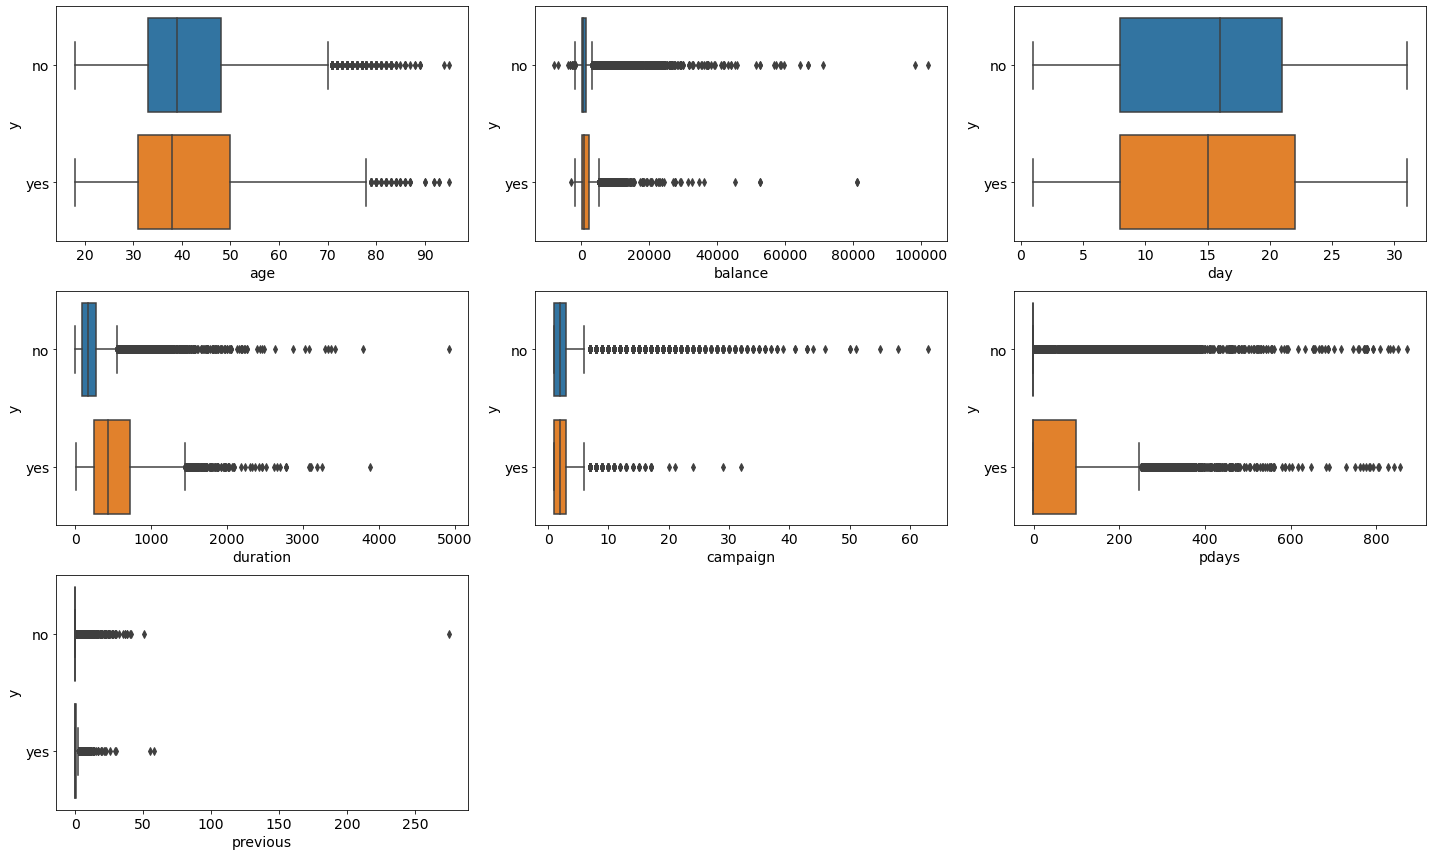

In [19]:
plt.figure(figsize=(20, 12))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//2, 3, i+1)
    ax = sns.boxplot(
        x = df[num_cols[i]],
        y = df["y"],
    )
    ax.set_xlabel(str(num_cols[i]), fontsize = 14)
    ax.set_ylabel("y", fontsize = 14)
    ax.tick_params(labelsize=14)
plt.tight_layout()
plt.show()

In [20]:
df.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


It appears user with longer duration when being called by the bank (`duration`) has higher tendency to subscribe to term deposito. User whose subscribed has average call duration of 537 seconds or 8.95 minutes, compared to those whose not subscribed with duration of 221 seconds or 3.68 minutes

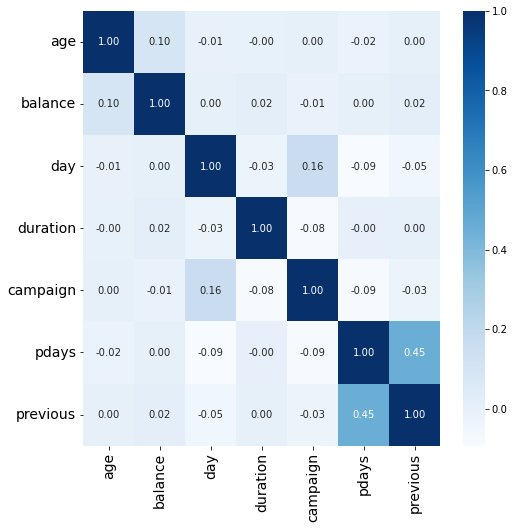

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.tick_params(labelsize=14)
plt.yticks(rotation=0)
plt.xticks(rotation=90);

### Categorical Features

In [22]:
cat_cols = list(df.select_dtypes(object).drop(columns=['y']).columns)
print("Categorical Features Length",len(cat_cols), ":", cat_cols)

Categorical Features Length 9 : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [23]:
cat_cols = list(df.select_dtypes(object).drop(columns=['y']).columns)
print("Categorical Features Length",len(cat_cols), ":", cat_cols)

Categorical Features Length 9 : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


There are 9 categorical features in the dataset

#### Univariate Analysis

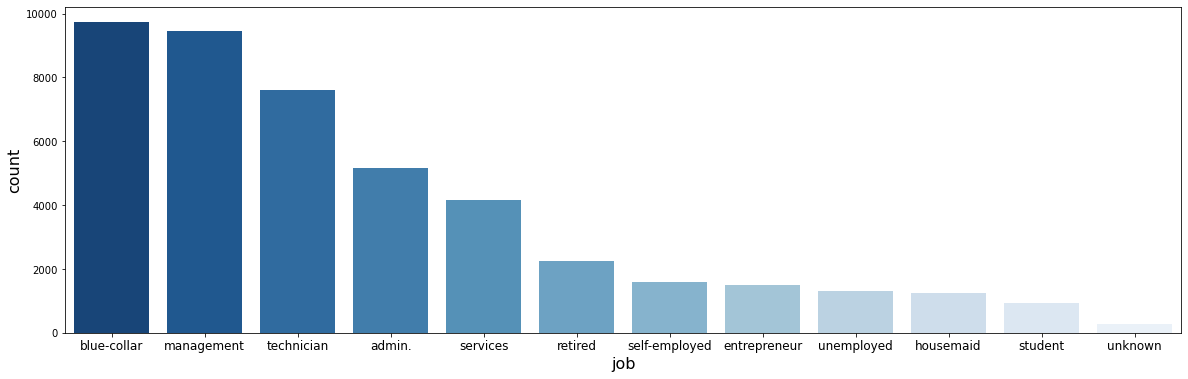

In [24]:
#plot feature 'job'
plt.figure(figsize=(20,6))
sns.countplot(x=df['job'],
              order = df['job'].value_counts().sort_values(ascending = False).index,
              palette="Blues_r")
plt.xticks(fontsize=12)
plt.xlabel('job', fontsize=16)
plt.ylabel('count', fontsize=16);

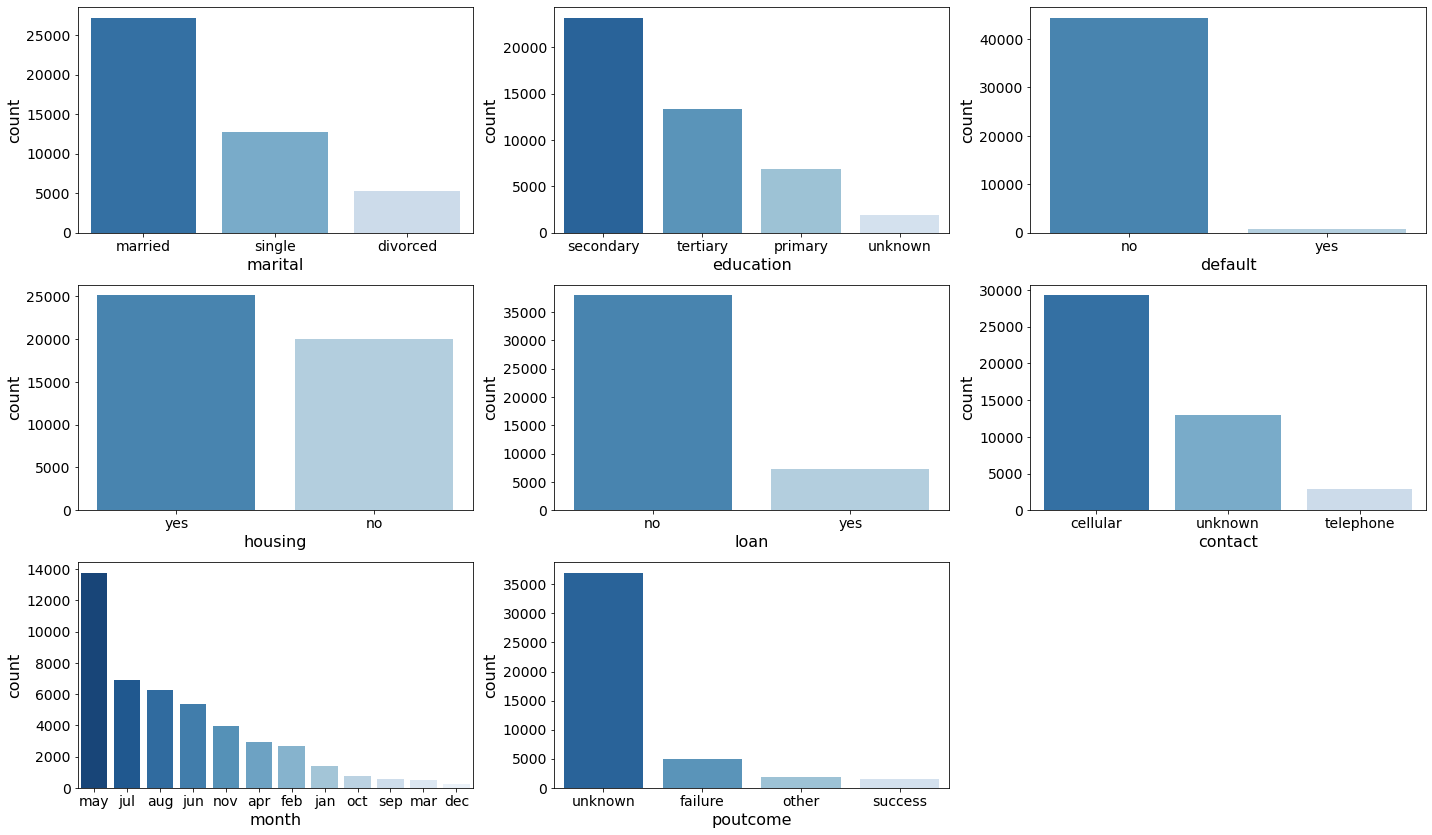

In [25]:
# plot all categorical features
plt.figure(figsize = (20, 15))
for i in range(len(cat_cols[1:])):
    plt.subplot(len(cat_cols[1:])//2, 3, i + 1)
    ax = sns.countplot(
        x = df[cat_cols[1:][i]],
        # order by frequency
        order = df[cat_cols[1:][i]].value_counts().sort_values(ascending = False).index,
        palette="Blues_r")
    ax.tick_params(labelsize=14)
    ax.set_xlabel(str(cat_cols[i+1]), fontsize = 16)
    ax.set_ylabel('count', fontsize = 16)
plt.tight_layout()
plt.show()

- Majority of user are married
- Majority of user have secondary education
- Majority of user have no default credit
- Majority of user have housing loan
- Majority of user have personal loan
- Majority of contact communication type are unknown
- Majority of user are contacted on Mat
- Majority of outcome of previous marketing campaign are unknown

#### Bivariate Analysis

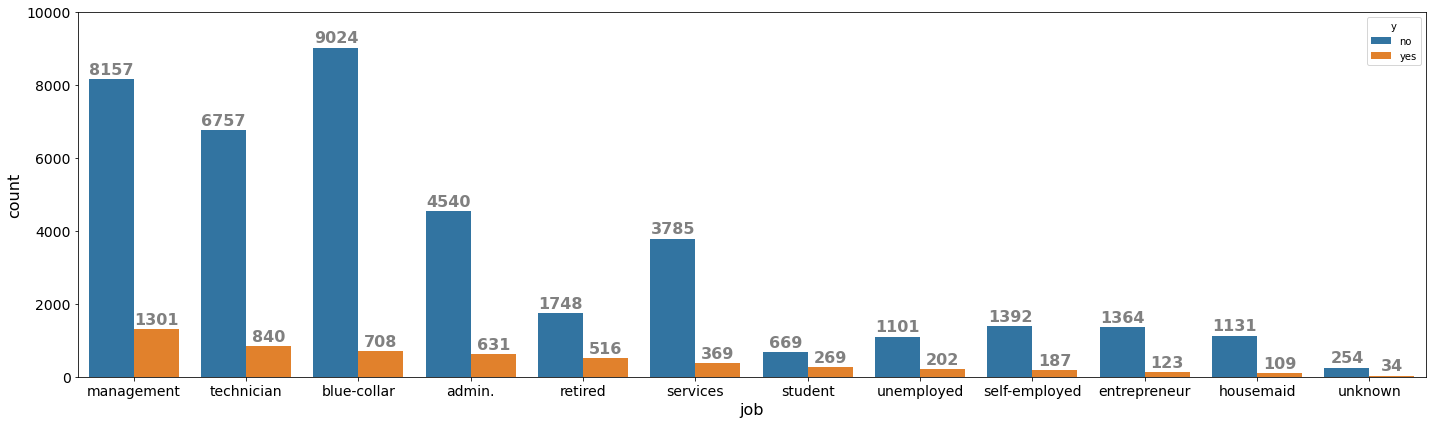

In [26]:
# plot job features
plt.figure(figsize=(20,6))
ax = sns.countplot(
     x = df['job'],
     hue = df['y'],
     order = pd.crosstab(df['job'], df['y']).sort_values('yes', ascending = False).index,
    )
    
# annotate bar
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center',
        fontweight = 'semibold',
        size = 16,
        xytext = (0, 5), 
        textcoords = 'offset points',
        color = 'grey'
        )

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('job', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.ylim(0,10000)
plt.tight_layout()
plt.show();

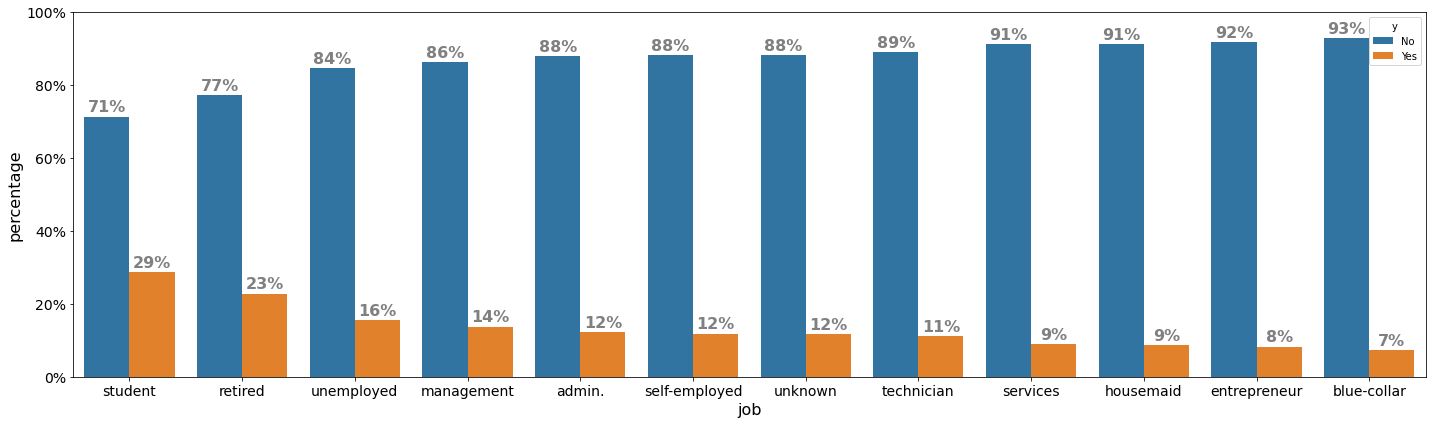

In [27]:
# create percentage df
dist = df.groupby(['job', "y"]).count()[["age"]]
cat_group = df.groupby('job').count()[["age"]]
dist["percentage"] = dist.div(cat_group, level = 'job') * 100
dist.reset_index(inplace = True)
dist.columns = ["job", "y", "count", "percentage"]

# plot
plt.figure(figsize=(20,6))
ax = sns.barplot(
     x = 'job',
     y = "percentage",
     hue = "y",
     data = dist,
     order = dist.iloc[dist[dist['y'] == "yes"]['percentage'].sort_values(ascending = False).index]['job'],
    )

# set yticks format to percentage
y_ = [x for x in range(0, 120, 20)]
plt.yticks(y_)
ylabels = [format(y) + '%' for y in ax.get_yticks()]
ax.set_yticklabels(labels = ylabels);

# annotate bar
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f') + "%",
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center',
        fontweight = 'semibold',
        size = 16,
        xytext = (0, 5), 
        textcoords = 'offset points',
        color = 'grey'
        )

# set legend label
L = ax.legend(loc='upper right', title="y")
L.get_texts()[0].set_text('No')
L.get_texts()[1].set_text('Yes')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('job', fontsize=16)
plt.ylabel('percentage', fontsize=16)
plt.tight_layout();

- By percentage, user with job as student and retired have more tendency to subscribe to term deposit. 
- User with job as management has highest count of deposit subscriber compared to other job.

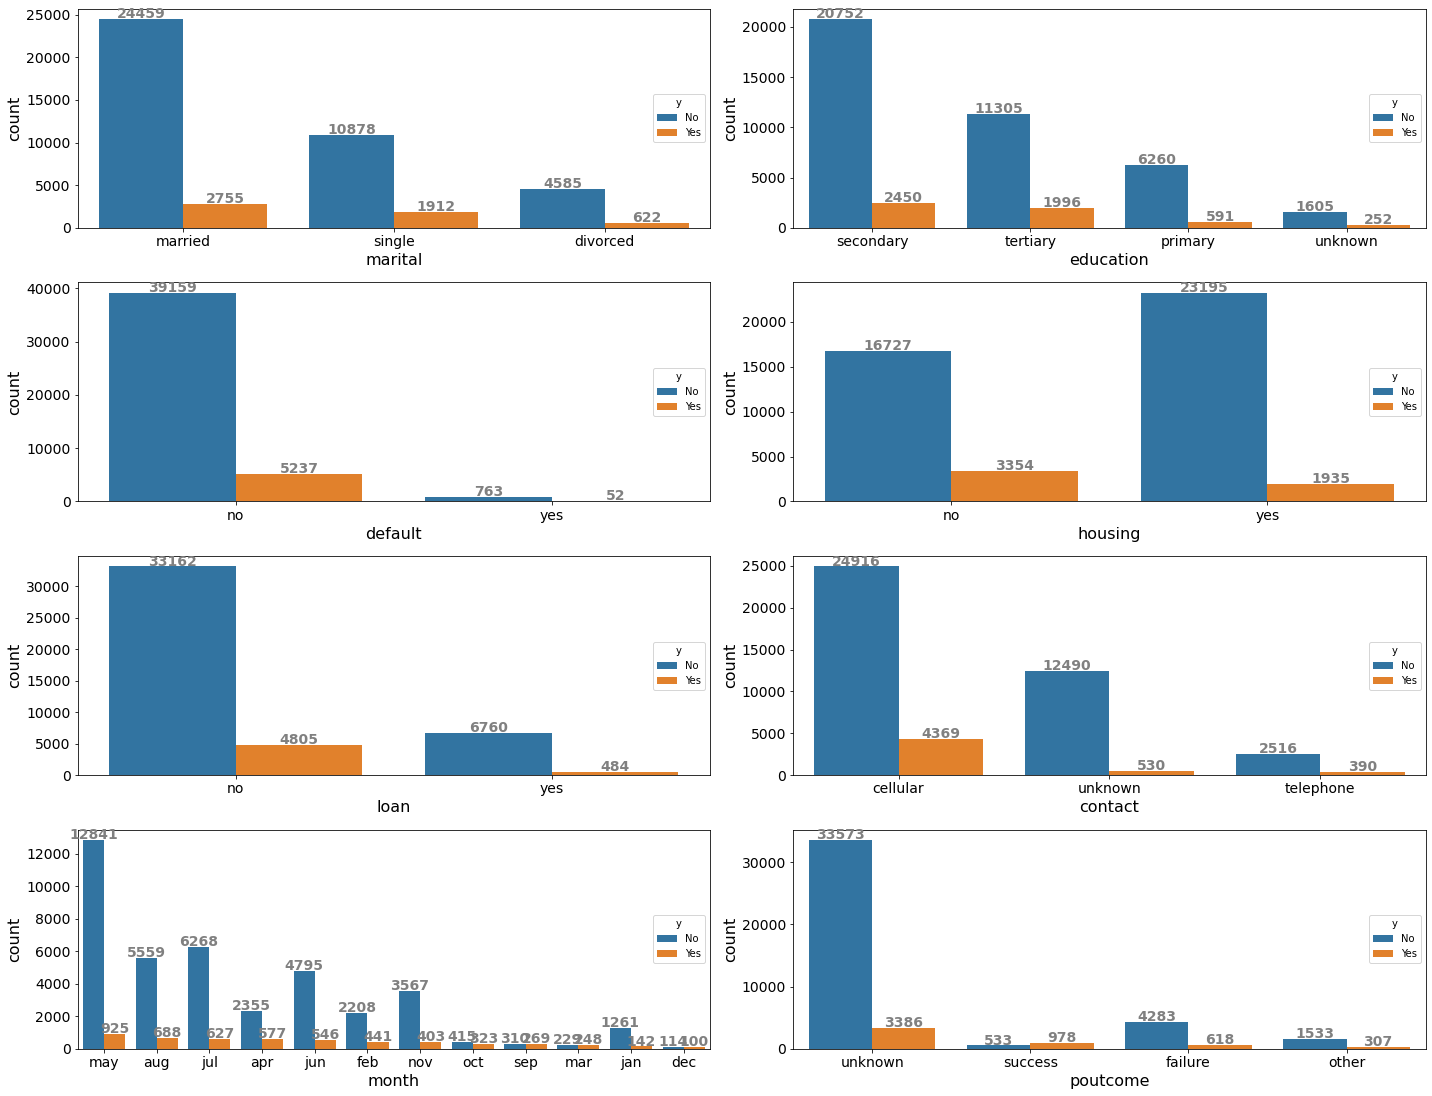

In [28]:
# plot all categorical features
plt.figure(figsize = (20, 30))
for i in range(len(cat_cols[1:])):
    plt.subplot(len(cat_cols[1:])//1, 2, i + 1)
    ax = sns.countplot(
        x = df[cat_cols[1:][i]],
        hue = df['y'],
        # order by frequency
        order = pd.crosstab(df[cat_cols[1:][i]], df['y']).sort_values("yes", ascending = False).index,
    )
    
    # annotate bar
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f'),
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center',
            fontweight = 'semibold',
            size = 14,
            xytext = (0, 1), 
            textcoords = 'offset points',
            color = 'grey'
        )
        L = ax.legend(loc='center right', title="y")
        L.get_texts()[0].set_text('No')
        L.get_texts()[1].set_text('Yes')

    ax.tick_params(labelsize=14)
    ax.set_xlabel(str(cat_cols[i+1]), fontsize = 16)
    ax.set_ylabel('count', fontsize = 16)
        
plt.tight_layout()
plt.show()

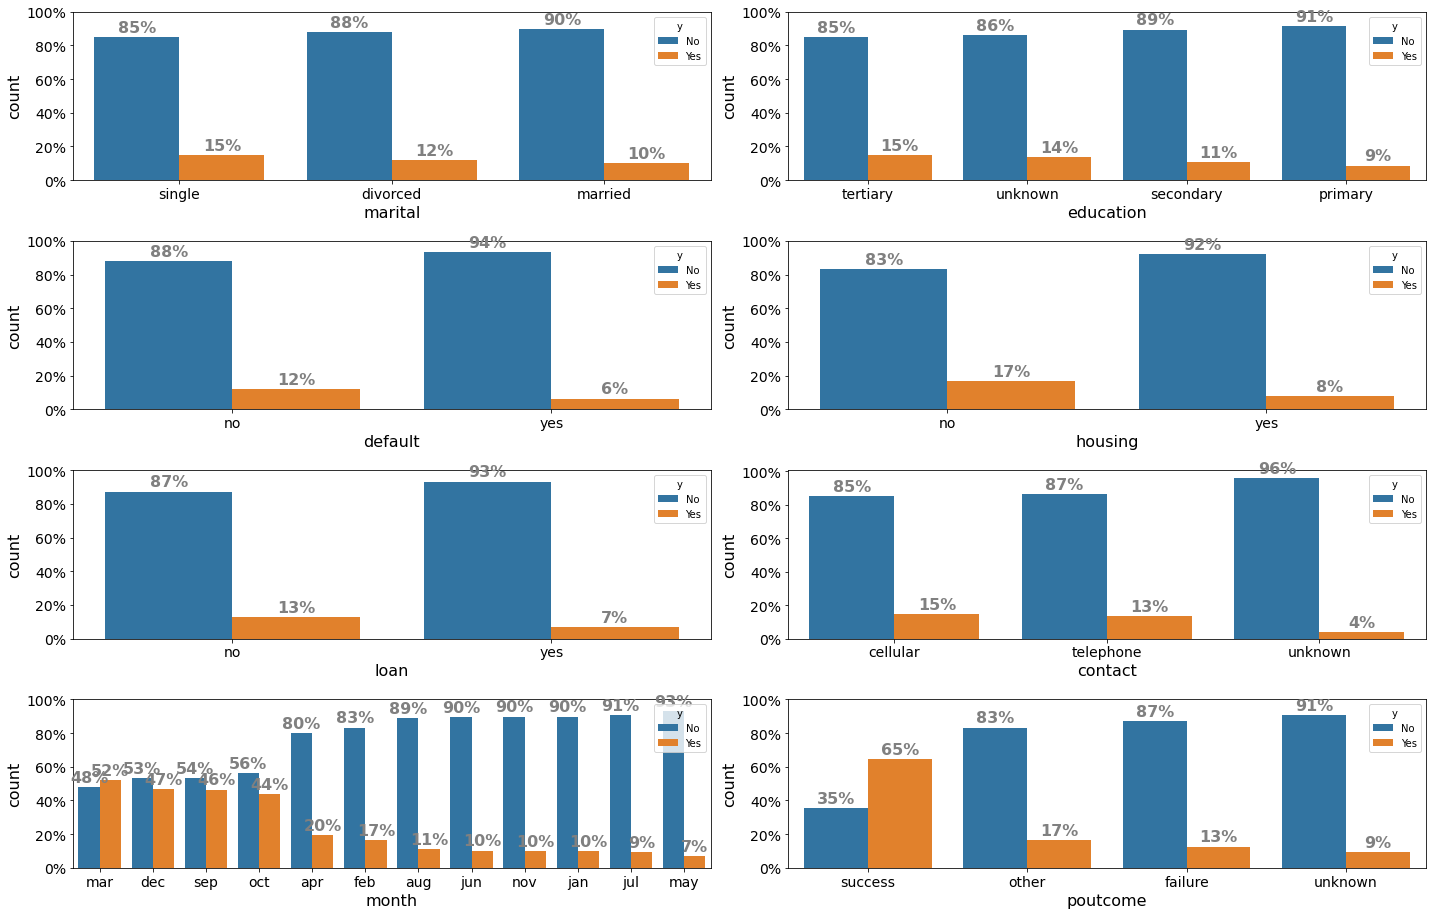

In [29]:
# plot all categorical features in percent
plt.figure(figsize = (20, 25))

for i in range(len(cat_cols[1:])):
    # create percentage df
    dist = df.groupby([str(cat_cols[1:][i]), "y"]).count()[["age"]]
    cat_group = df.groupby([str(cat_cols[1:][i])]).count()[["age"]]
    dist["percentage"] = dist.div(cat_group, level = str(cat_cols[1:][i])) * 100
    dist.reset_index(inplace = True)
    dist.columns = [str(cat_cols[1:][i]), "y", "count", "percentage"]
    
    # plot
    plt.subplot(len(cat_cols[1:])//1, 2, i + 1)
    ax = sns.barplot(
        x = str(cat_cols[1:][i]),
        y = "percentage",
        hue = "y",
        data = dist,
        order = dist.iloc[dist[dist['y'] == "yes"]['percentage'].sort_values(ascending = False).index][str(cat_cols[1:][i])]
    )
    
    # set yticks format
    y_ = [x for x in range(0, 120, 20)]
    plt.yticks(y_)
    ylabels = [format(y) + '%' for y in ax.get_yticks()]
    ax.set_yticklabels(labels = ylabels)
    
    # annotate bar
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f') + "%",
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center',
            fontweight = 'semibold',
            size = 16,
            xytext = (0, 5), 
            textcoords = 'offset points',
            color = 'grey'
        )
        # set legend label
        L = ax.legend(loc='upper right', title="y")
        L.get_texts()[0].set_text('No')
        L.get_texts()[1].set_text('Yes')
        
    ax.tick_params(labelsize=14)
    ax.set_xlabel(str(cat_cols[i+1]), fontsize = 16)
    ax.set_ylabel('count', fontsize = 16)
    
plt.tight_layout()
plt.show()

- User with single marital status are more inclined to subscribe than other marital status
- User with no default are more inclined to subscribe
- User with no housing loan are more inclined to subscribe
- User with no personal loan are more inclined to subscribe
- User with outcome 'success' from previous marketing campaign are more inclined to subscribe to term deposit
- Even though total user contacted in May has highest tendency to subscribe, the percentage ratio is the lowest compared to other months

### Business Insight

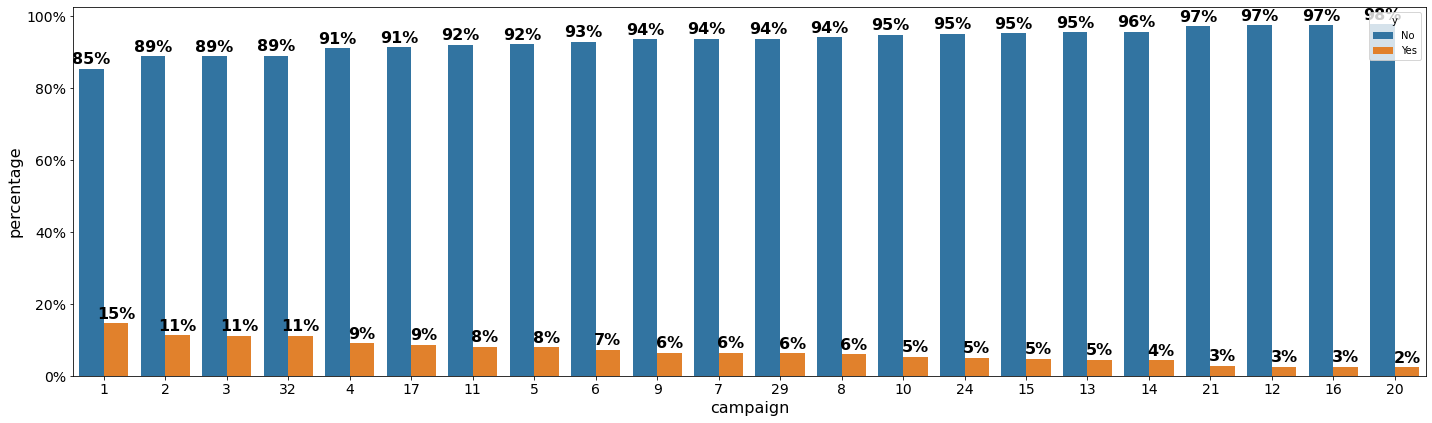

In [30]:
# create percentage df
dist = df.groupby(['campaign', 'y']).count()[["age"]]
cat_group = df.groupby('campaign').count()[["age"]]
dist["percentage"] = dist.div(cat_group, level = 'campaign') * 100
dist.reset_index(inplace = True)
dist.columns = ["campaign", "y", "count", "percentage"]

# plot
plt.figure(figsize=(20,6))
ax = sns.barplot(
     x = 'campaign',
     y = "percentage",
     hue = "y",
     data = dist,
     order = dist.iloc[dist[dist['y'] == "yes"]['percentage'].sort_values(ascending = False).index]['campaign'],
    )

# set yticks format to percentage
y_ = [x for x in range(0, 120, 20)]
plt.yticks(y_)
ylabels = [format(y) + '%' for y in ax.get_yticks()]
ax.set_yticklabels(labels = ylabels);

# annotate bar
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f') + "%",
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center',
        fontweight = 'semibold',
        size = 16,
        xytext = (0, 5), 
        textcoords = 'offset points'
        )
    
# set legend label
L = ax.legend(loc='upper right', title="y")
L.get_texts()[0].set_text('No')
L.get_texts()[1].set_text('Yes')
    
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('campaign', fontsize=16)
plt.ylabel('percentage', fontsize=16)
plt.tight_layout();

User whose contacted 1 - 3 times in this campaign are more inclined to subscribe to term deposit than those whose contacted more than 3 times

### Target Variable

In [31]:
df.groupby('y').agg({'age' : 'count'}).rename({'age' : 'count'})

,age
y,
no,39922
yes,5289


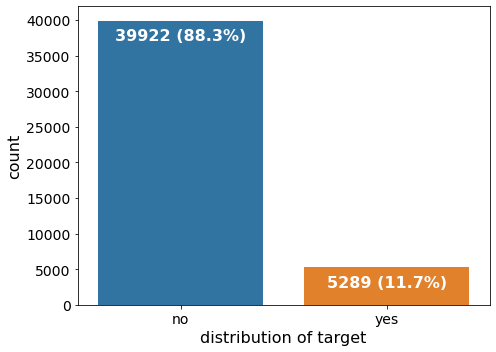

In [32]:
plt.figure(figsize = (7, 5))
ax = sns.countplot(
    x = df['y'],
)
# annotate bar
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f') + " (" + format(p.get_height()*100/len(df), '.1f') + "%)",
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center',
        fontweight = 'semibold',
        size = 16,
        xytext = (0, -20), 
        textcoords = 'offset points',
        color = 'white'
    )
    
ax.tick_params(labelsize=14)
ax.set_xlabel('distribution of target', fontsize = 16)
ax.set_ylabel('count', fontsize = 16)
plt.tight_layout()
plt.show()

## Data Preprocessing

### Target Variable

In [33]:
y_map = {
    'yes' : 1,
    'no' : 0
}

df['y_map'] = df['y'].map(y_map)
df.drop(columns=['y'], inplace=True)

In [34]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_map
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


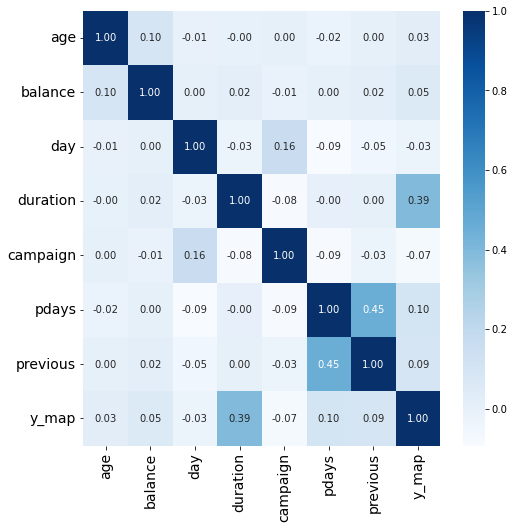

In [35]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.tick_params(labelsize=14)
plt.yticks(rotation=0)
plt.xticks(rotation=90);

### Outlier Handling with IQR

In [36]:
print(f'Jumlah baris sebelum memfilter outlier: {df.shape[0]}')

iqr_entries = np.array([True] * len(df))

for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    low_lim = q1 - (1.5 * iqr)
    high_lim = q3 + (1.5 * iqr)
    iqr_entries = ((df[col] >= low_lim) & (df[col] <= high_lim)) # filtering with IQR
    
dfi = df[iqr_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {dfi.shape[0]}')

Jumlah baris sebelum memfilter outlier: 45211
Jumlah baris setelah memfilter outlier: 36954


### Outlier Handling with Z-Score

In [37]:
print(f'Number of rows before outlier handling: {df.shape[0]}')

zscore_entries = np.array([True] * len(df))

for col in num_cols:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    zscore_entries = (zscore < 3) & zscore_entries  # filtering with absolute z-score value < 3
    
dfz = df[zscore_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Number of rows before outlier handling: {dfz.shape[0]}')

Number of rows before outlier handling: 45211
Number of rows before outlier handling: 40209


In [38]:
df.shape

(45211, 17)

In [39]:
dfi.shape

(36954, 17)

Outlier handling with Z-score removes less data than with IQR. 

Distribution of data after outlier handling using z-score

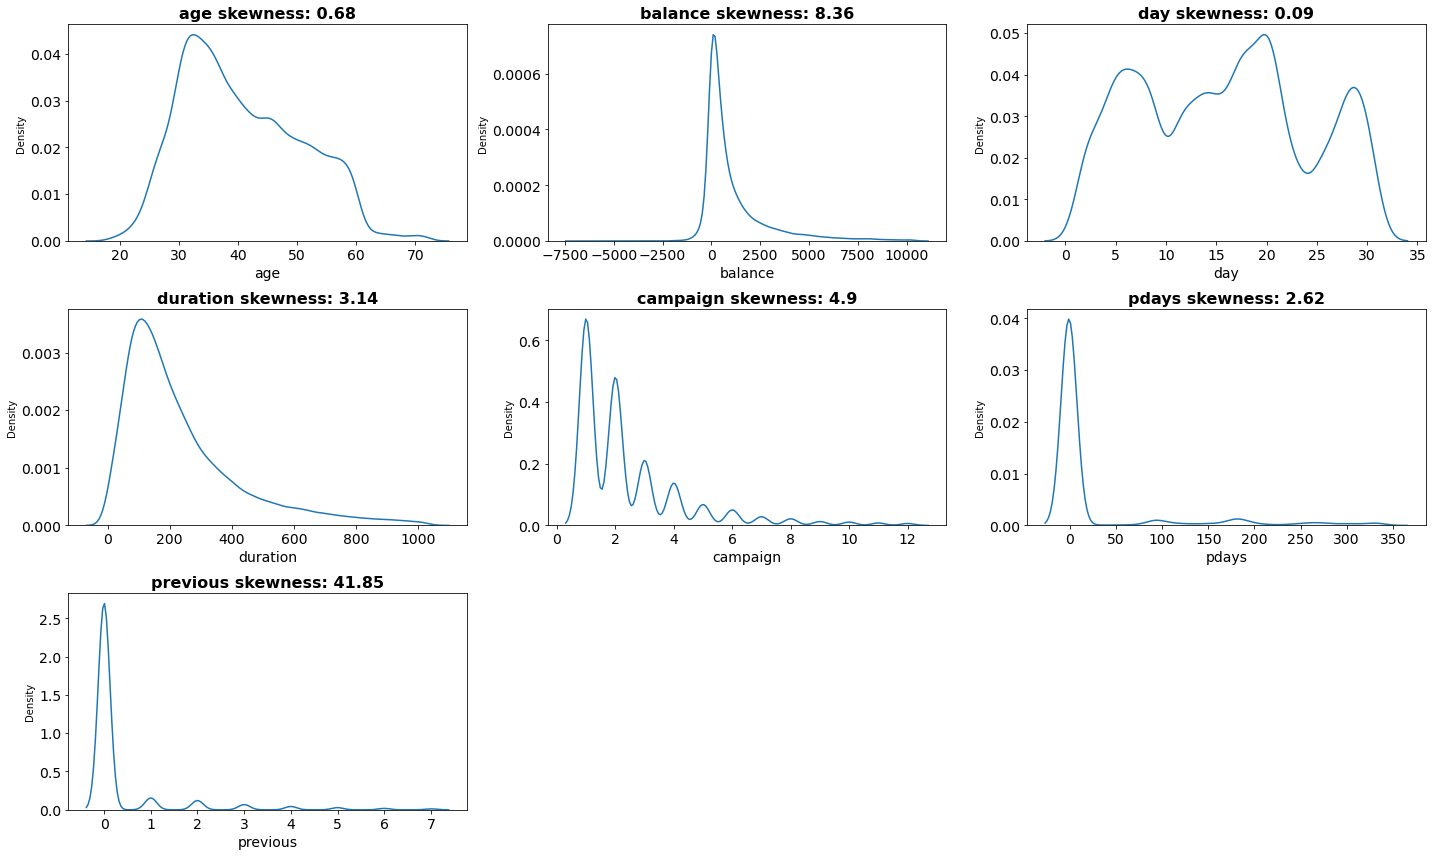

In [40]:
plt.figure(figsize=(20, 12))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//2, 3, i+1)
    ax = sns.kdeplot(
        dfz[num_cols[i]]
    )
    ax.set_xlabel(str(num_cols[i]), fontsize = 14)
    ax.tick_params(labelsize=14)
    ax.set_title(str(num_cols[i]) + ' skewness: ' + str(round(num_cols_skewness[i], 2)), fontsize=16, fontweight='heavy')
plt.tight_layout()
plt.show()

In [41]:
dfz.describe()

,age,balance,day,duration,campaign,pdays,previous,y_map
count,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000
mean,40.659728,1083.466189,15.819792,235.794723,2.464324,25.184312,0.352632,0.100823
std,10.086648,1722.823814,8.363663,190.408412,1.951391,71.762763,1.056890,0.301098
min,18.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,66.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,430.000000,16.000000,178.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1345.000000,21.000000,306.000000,3.000000,-1.000000,0.000000,0.000000
max,72.000000,10483.000000,31.000000,1030.000000,12.000000,340.000000,7.000000,1.000000


### Feature Transformation

#### Log Transformation

Log transformation without outlier removed

D:\Python\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Python\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Python\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Python\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Python\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


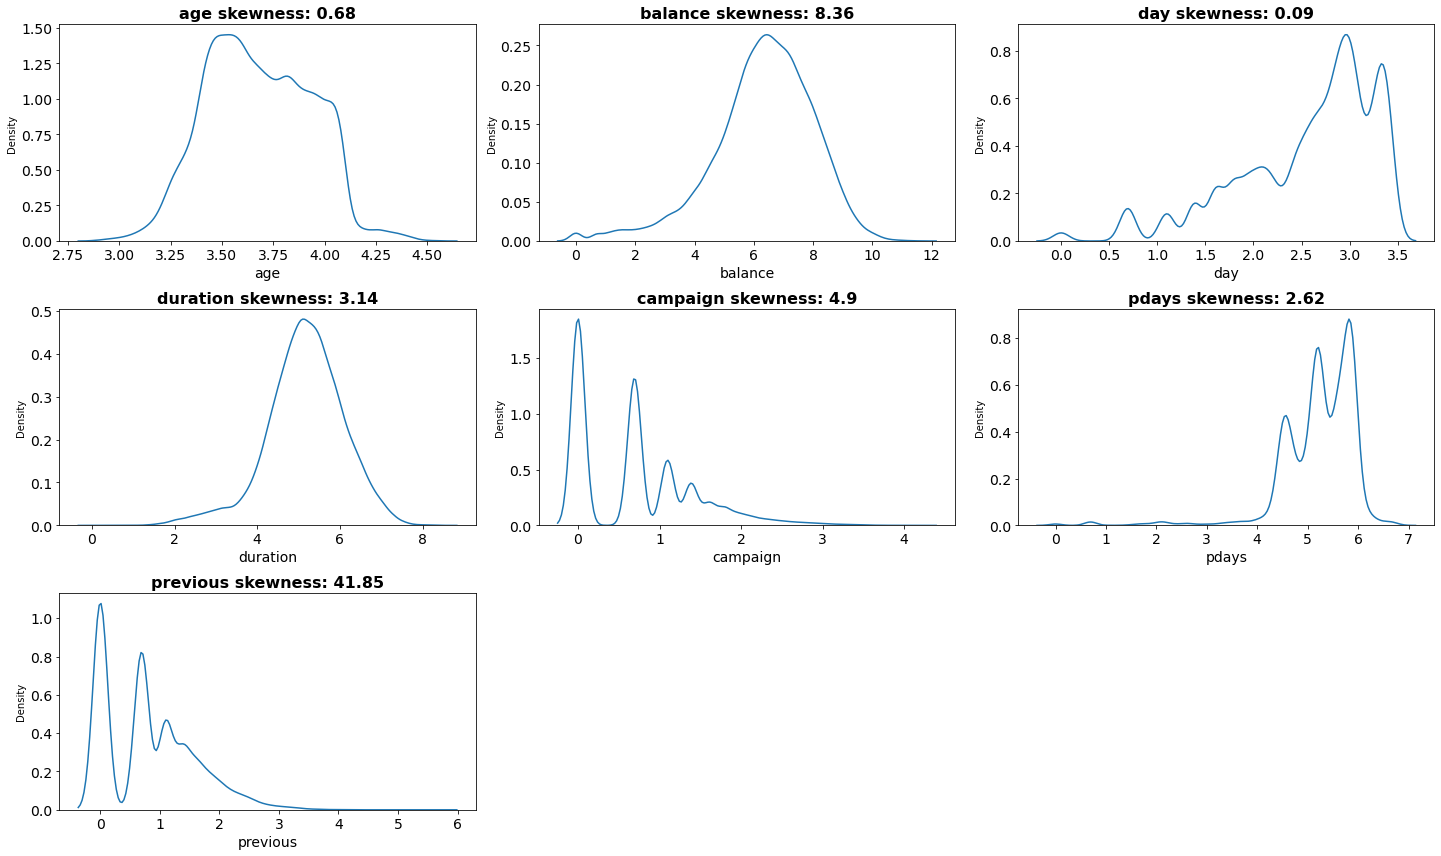

In [42]:
plt.figure(figsize=(20, 12))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//2, 3, i+1)
    ax = sns.kdeplot(
        np.log(df[num_cols[i]])
    )
    ax.set_xlabel(str(num_cols[i]), fontsize = 14)
    ax.tick_params(labelsize=14)
    ax.set_title(str(num_cols[i]) + ' skewness: ' + str(round(num_cols_skewness[i], 2)), fontsize=16, fontweight='heavy')
plt.tight_layout()
plt.show();

Log transformation with outlier removed with z-score

D:\Python\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Python\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Python\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Python\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Python\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


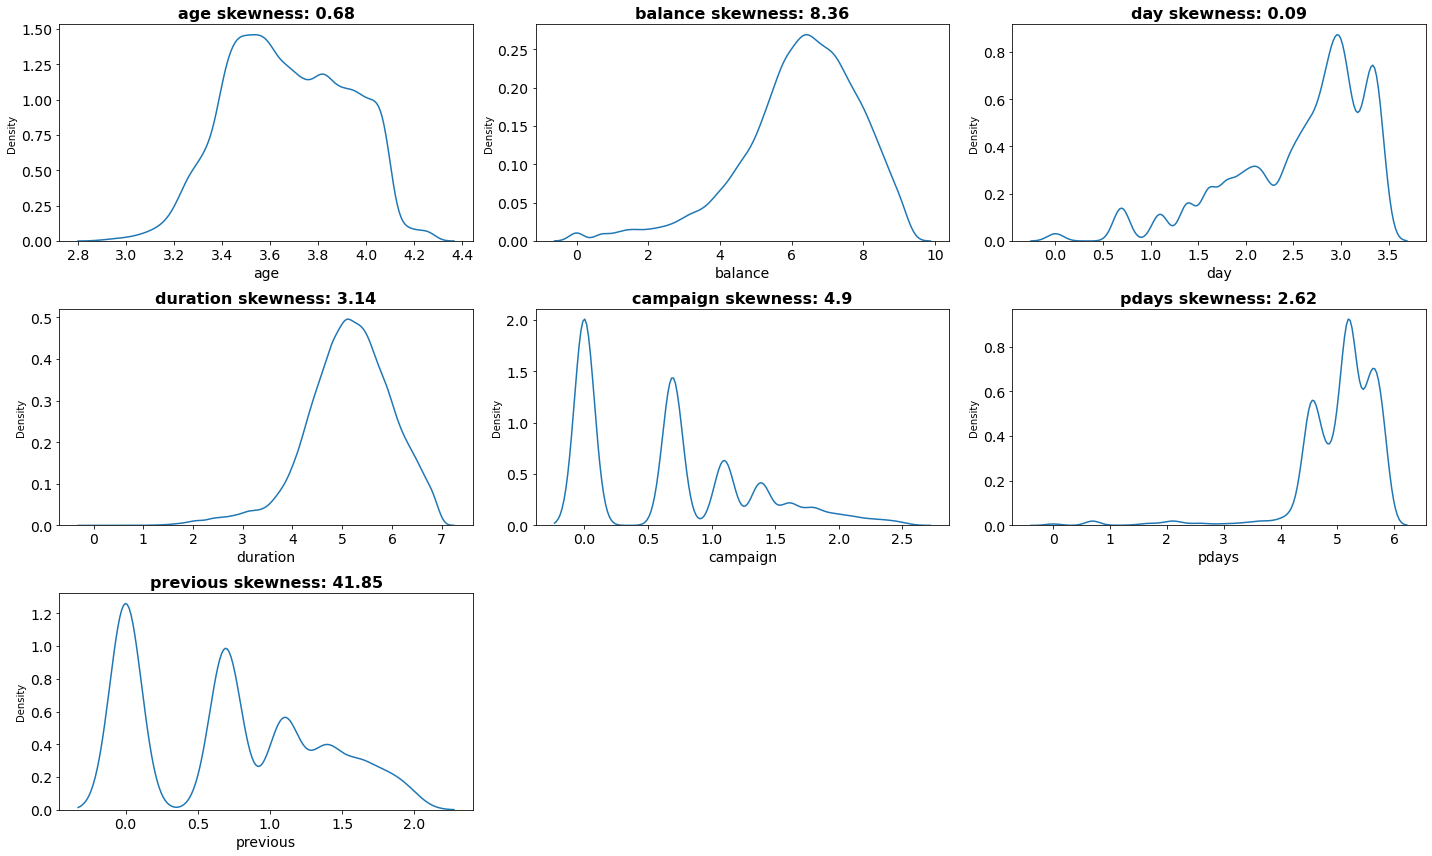

In [43]:
plt.figure(figsize=(20, 12))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//2, 3, i+1)
    ax = sns.kdeplot(
        np.log(dfz[num_cols[i]])
    )
    ax.set_xlabel(str(num_cols[i]), fontsize = 14)
    ax.tick_params(labelsize=14)
    ax.set_title(str(num_cols[i]) + ' skewness: ' + str(round(num_cols_skewness[i], 2)), fontsize=16, fontweight='heavy')
plt.tight_layout()
plt.show();

#### Normalization of `balance` feature

**Log transformation doesn't do much to handle data distribution, so it is not necessary to perform log transformation to our data**

In [44]:
df['balance_norm'] = MinMaxScaler().fit_transform(df['balance'].values.reshape(len(df), 1))
df.drop(columns=['balance'], inplace=True)

In [45]:
dfi['balance_norm'] = MinMaxScaler().fit_transform(dfi['balance'].values.reshape(len(dfi), 1))
dfi.drop(columns=['balance'], inplace=True)

C:\Users\User\AppData\Local\Temp/ipykernel_8660/1688101156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfi['balance_norm'] = MinMaxScaler().fit_transform(dfi['balance'].values.reshape(len(dfi), 1))
D:\Python\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [46]:
df.head()

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_map,balance_norm
0,58,management,married,tertiary,no,yes,no,unknown,5,may,261,1,-1,0,unknown,0,0.092259
1,44,technician,single,secondary,no,yes,no,unknown,5,may,151,1,-1,0,unknown,0,0.073067
2,33,entrepreneur,married,secondary,no,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,0.072822
3,47,blue-collar,married,unknown,no,yes,no,unknown,5,may,92,1,-1,0,unknown,0,0.086476
4,33,unknown,single,unknown,no,no,no,unknown,5,may,198,1,-1,0,unknown,0,0.072812


#### Normalization of `duration` feature

In [47]:
df['duration_norm'] = MinMaxScaler().fit_transform(df['duration'].values.reshape(len(df), 1))
df.drop(columns=['duration'], inplace=True)

In [48]:
dfi['duration_norm'] = MinMaxScaler().fit_transform(dfi['duration'].values.reshape(len(dfi), 1))
dfi.drop(columns=['duration'], inplace=True)

C:\Users\User\AppData\Local\Temp/ipykernel_8660/1694166117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfi['duration_norm'] = MinMaxScaler().fit_transform(dfi['duration'].values.reshape(len(dfi), 1))
D:\Python\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
df.head()

,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y_map,balance_norm,duration_norm
0,58,management,married,tertiary,no,yes,no,unknown,5,may,1,-1,0,unknown,0,0.092259,0.053070
1,44,technician,single,secondary,no,yes,no,unknown,5,may,1,-1,0,unknown,0,0.073067,0.030704
2,33,entrepreneur,married,secondary,no,yes,yes,unknown,5,may,1,-1,0,unknown,0,0.072822,0.015453
3,47,blue-collar,married,unknown,no,yes,no,unknown,5,may,1,-1,0,unknown,0,0.086476,0.018707
4,33,unknown,single,unknown,no,no,no,unknown,5,may,1,-1,0,unknown,0,0.072812,0.040260


#### Normalization of `age` feature

In [50]:
df['age_norm'] = MinMaxScaler().fit_transform(df['age'].values.reshape(len(df), 1))

In [51]:
dfi['age_norm'] = MinMaxScaler().fit_transform(dfi['age'].values.reshape(len(dfi), 1))

C:\Users\User\AppData\Local\Temp/ipykernel_8660/3957609596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfi['age_norm'] = MinMaxScaler().fit_transform(dfi['age'].values.reshape(len(dfi), 1))


In [52]:
df.head()

,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y_map,balance_norm,duration_norm,age_norm
0,58,management,married,tertiary,no,yes,no,unknown,5,may,1,-1,0,unknown,0,0.092259,0.053070,0.519481
1,44,technician,single,secondary,no,yes,no,unknown,5,may,1,-1,0,unknown,0,0.073067,0.030704,0.337662
2,33,entrepreneur,married,secondary,no,yes,yes,unknown,5,may,1,-1,0,unknown,0,0.072822,0.015453,0.194805
3,47,blue-collar,married,unknown,no,yes,no,unknown,5,may,1,-1,0,unknown,0,0.086476,0.018707,0.376623
4,33,unknown,single,unknown,no,no,no,unknown,5,may,1,-1,0,unknown,0,0.072812,0.040260,0.194805


In [53]:
df.drop(columns=['age'], inplace=True)

In [54]:
dfi.drop(columns=['age'], inplace=True)

D:\Python\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


-- to be continued with feature transformation

## Feature Encoding

In [55]:
for col in cat_cols:
    print(f'''Value count on column {col}:''')
    print(df[col].value_counts())
    print('---'*10, '\n')

Value count on column job:
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
------------------------------ 

Value count on column marital:
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
------------------------------ 

Value count on column education:
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
------------------------------ 

Value count on column default:
no     44396
yes      815
Name: default, dtype: int64
------------------------------ 

Value count on column housing:
yes    25130
no     20081
Name: housing, dtype: int64
------------------------------ 

Value count on column loan:
no     37967
yes     7244
Name: loan, dtype: int64
-------------------

Feature categorical feature, we will use the following encoding:
- Label encoding : `education`, `default`, `housing`, `loan`
- One hot encoding : `job`, `marital`, `contact`, `poutcome`

#### Label encoding

In [56]:
df.head()

,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y_map,balance_norm,duration_norm,age_norm
0,management,married,tertiary,no,yes,no,unknown,5,may,1,-1,0,unknown,0,0.092259,0.053070,0.519481
1,technician,single,secondary,no,yes,no,unknown,5,may,1,-1,0,unknown,0,0.073067,0.030704,0.337662
2,entrepreneur,married,secondary,no,yes,yes,unknown,5,may,1,-1,0,unknown,0,0.072822,0.015453,0.194805
3,blue-collar,married,unknown,no,yes,no,unknown,5,may,1,-1,0,unknown,0,0.086476,0.018707,0.376623
4,unknown,single,unknown,no,no,no,unknown,5,may,1,-1,0,unknown,0,0.072812,0.040260,0.194805


In [57]:
cat_labels = ['education','default','housing','loan']

In [58]:
for col in cat_labels:
    df[col] = label_encoder.fit_transform(df[col])

In [59]:
for col in cat_labels:
    dfi[col] = label_encoder.fit_transform(dfi[col])

C:\Users\User\AppData\Local\Temp/ipykernel_8660/3624595857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfi[col] = label_encoder.fit_transform(dfi[col])


In [60]:
df.head()

,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y_map,balance_norm,duration_norm,age_norm
0,management,married,2,0,1,0,unknown,5,may,1,-1,0,unknown,0,0.092259,0.053070,0.519481
1,technician,single,1,0,1,0,unknown,5,may,1,-1,0,unknown,0,0.073067,0.030704,0.337662
2,entrepreneur,married,1,0,1,1,unknown,5,may,1,-1,0,unknown,0,0.072822,0.015453,0.194805
3,blue-collar,married,3,0,1,0,unknown,5,may,1,-1,0,unknown,0,0.086476,0.018707,0.376623
4,unknown,single,3,0,0,0,unknown,5,may,1,-1,0,unknown,0,0.072812,0.040260,0.194805


#### One-hot Encoding

In [61]:
for col in ['job', 'marital', 'contact', 'poutcome']:
    onehots = pd.get_dummies(df[col], prefix=col)
    df = df.join(onehots)

In [62]:
for col in ['job', 'marital', 'contact', 'poutcome']:
    onehots = pd.get_dummies(dfi[col], prefix=col)
    dfi = dfi.join(onehots)

Drop outdated columns

In [63]:
df.drop(columns=['job','marital','contact','poutcome'], inplace=True)

In [64]:
dfi.drop(columns=['job','marital','contact','poutcome'], inplace=True)

In [65]:
df.head()

,education,default,housing,loan,day,month,campaign,pdays,previous,y_map,balance_norm,duration_norm,age_norm,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,2,0,1,0,5,may,1,-1,0,0,0.092259,0.053070,0.519481,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,1,0,1,0,5,may,1,-1,0,0,0.073067,0.030704,0.337662,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
2,1,0,1,1,5,may,1,-1,0,0,0.072822,0.015453,0.194805,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,3,0,1,0,5,may,1,-1,0,0,0.086476,0.018707,0.376623,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,3,0,0,0,5,may,1,-1,0,0,0.072812,0.040260,0.194805,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1


In [66]:
df.shape

(45211, 35)

### Handling Imbalance Data

In [67]:
df['y_map'].value_counts()

0    39922
1     5289
Name: y_map, dtype: int64

In [68]:
X = df.drop(columns=['y_map'])
y = df['y_map']
print(X.shape)
print(y.shape)

(45211, 34)
(45211,)


In [69]:
A = dfi.drop(columns=['y_map'])
b = dfi['y_map']
print(A.shape)
print(b.shape)

(36954, 31)
(36954,)


In [70]:
from imblearn.over_sampling import SMOTE
X_under, y_under = under_sampling.RandomUnderSampler(0.5).fit_resample(X, y)
X_over, y_over = over_sampling.RandomOverSampler(0.5).fit_resample(X, y)


D:\Python\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(
D:\Python\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [71]:
from imblearn.over_sampling import SMOTE
A_under, b_under = under_sampling.RandomUnderSampler(0.5).fit_resample(A, b)
A_over, b_over = over_sampling.RandomOverSampler(0.5).fit_resample(A, b)

D:\Python\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(
D:\Python\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [72]:
print('Original')
print(pd.Series(y).value_counts())
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
0    39922
1     5289
Name: y_map, dtype: int64
UNDERSAMPLING
0    10578
1     5289
Name: y_map, dtype: int64
OVERSAMPLING
0    39922
1    19961
Name: y_map, dtype: int64
SMOTE


NameError: name 'y_over_SMOTE' is not defined

In [73]:
print('Original')
print(pd.Series(b).value_counts())
print('UNDERSAMPLING')
print(pd.Series(b_under).value_counts())
print('OVERSAMPLING')
print(pd.Series(b_over).value_counts())

Original
0    33570
1     3384
Name: y_map, dtype: int64
UNDERSAMPLING
0    6768
1    3384
Name: y_map, dtype: int64
OVERSAMPLING
0    33570
1    16785
Name: y_map, dtype: int64


### Feature Selection

From EDA, we can conclude that feature `day`, `pdays`, `previous` and `month` have no influence on target. Thus we will drop these columns.

In [74]:
df.drop(columns=['day','pdays','previous','month'], inplace=True)
df.head()

,education,default,housing,loan,campaign,y_map,balance_norm,duration_norm,age_norm,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,2,0,1,0,1,0,0.092259,0.053070,0.519481,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,1,0,1,0,1,0,0.073067,0.030704,0.337662,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
2,1,0,1,1,1,0,0.072822,0.015453,0.194805,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,3,0,1,0,1,0,0.086476,0.018707,0.376623,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,3,0,0,0,1,0,0.072812,0.040260,0.194805,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1


In [75]:
dfi.drop(columns=['day','pdays','previous','month'], inplace=True)
dfi.head()

,education,default,housing,loan,campaign,y_map,balance_norm,duration_norm,age_norm,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_unknown
0,2,0,1,0,1,0,0.092259,0.053070,0.519481,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1
1,1,0,1,0,1,0,0.073067,0.030704,0.337662,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1
2,1,0,1,1,1,0,0.072822,0.015453,0.194805,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
3,3,0,1,0,1,0,0.086476,0.018707,0.376623,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
4,3,0,0,0,1,0,0.072812,0.040260,0.194805,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   education          45211 non-null  int32  
 1   default            45211 non-null  int32  
 2   housing            45211 non-null  int32  
 3   loan               45211 non-null  int32  
 4   campaign           45211 non-null  int64  
 5   y_map              45211 non-null  int64  
 6   balance_norm       45211 non-null  float64
 7   duration_norm      45211 non-null  float64
 8   age_norm           45211 non-null  float64
 9   job_admin.         45211 non-null  uint8  
 10  job_blue-collar    45211 non-null  uint8  
 11  job_entrepreneur   45211 non-null  uint8  
 12  job_housemaid      45211 non-null  uint8  
 13  job_management     45211 non-null  uint8  
 14  job_retired        45211 non-null  uint8  
 15  job_self-employed  45211 non-null  uint8  
 16  job_services       452

In [77]:
df.describe()

,education,default,housing,loan,campaign,y_map,balance_norm,duration_norm,age_norm,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.00000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,1.224813,0.018027,0.555838,0.160226,2.763841,0.116985,0.085171,0.052494,0.297873,0.114375,0.215257,0.032890,0.027427,0.209197,0.050076,0.034925,0.09188,0.020747,0.168034,0.028820,0.006370,0.115171,0.601933,0.282896,0.647741,0.064276,0.287983,0.108403,0.040698,0.033421,0.817478
std,0.747997,0.133049,0.496878,0.366820,3.098021,0.321406,0.027643,0.052364,0.137906,0.318269,0.411005,0.178351,0.163326,0.406740,0.218105,0.183592,0.28886,0.142538,0.373901,0.167303,0.079559,0.319232,0.489505,0.450411,0.477680,0.245247,0.452828,0.310892,0.197592,0.179735,0.386278
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.073457,0.020943,0.194805,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.076871,0.036600,0.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.085768,0.064864,0.389610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,3.000000,1.000000,1.000000,1.000000,63.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


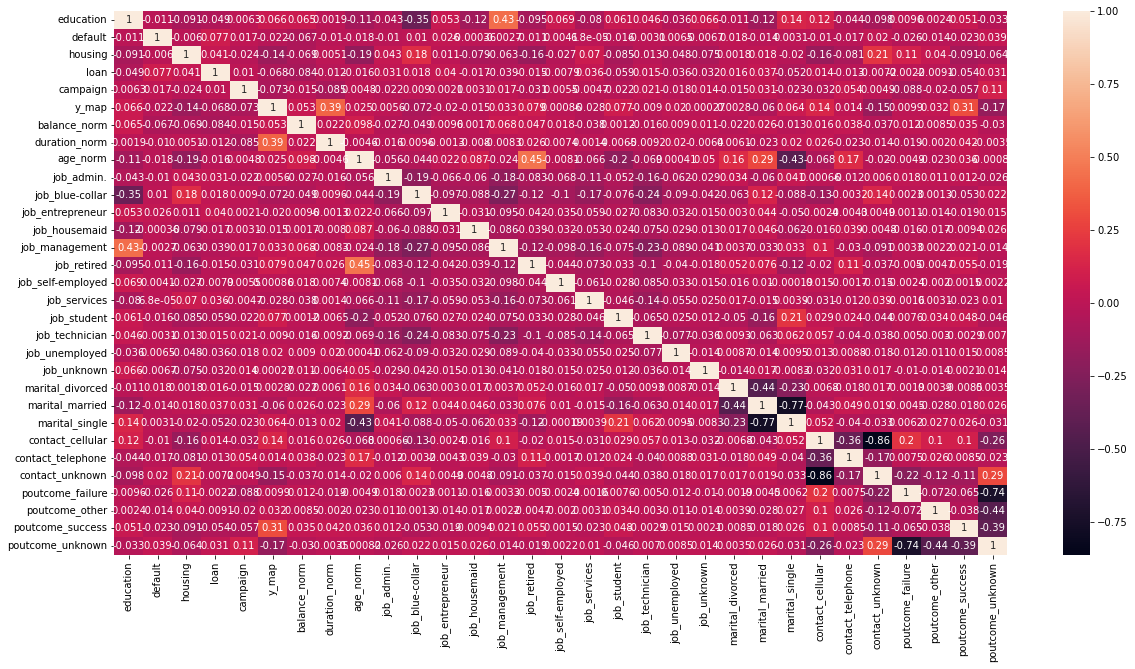

In [78]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot = True);

It seems no feature are strongly correlated with our target (`y_map`)

## And now our data are ready for modelling!!

** Extra for homework, added 4 new columns that possibly helpful and relevant to our case:
- Income
- Children/Dependants
- Location (certain city may have more user)

# Homework Supervised Learning

## 1. Modeling

### a) Split Data Train & Test

In [79]:
X = df
y = df['y_map']

<b> Skenario dihilangkan outlier <b>

In [80]:
A = dfi
b = dfi['y_map']

In [81]:
df.head()

,education,default,housing,loan,campaign,y_map,balance_norm,duration_norm,age_norm,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,2,0,1,0,1,0,0.092259,0.053070,0.519481,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,1,0,1,0,1,0,0.073067,0.030704,0.337662,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
2,1,0,1,1,1,0,0.072822,0.015453,0.194805,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,3,0,1,0,1,0,0.086476,0.018707,0.376623,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,3,0,0,0,1,0,0.072812,0.040260,0.194805,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1


In [82]:
dfi.head()

,education,default,housing,loan,campaign,y_map,balance_norm,duration_norm,age_norm,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_unknown
0,2,0,1,0,1,0,0.092259,0.053070,0.519481,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1
1,1,0,1,0,1,0,0.073067,0.030704,0.337662,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1
2,1,0,1,1,1,0,0.072822,0.015453,0.194805,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
3,3,0,1,0,1,0,0.086476,0.018707,0.376623,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
4,3,0,0,0,1,0,0.072812,0.040260,0.194805,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1


In [83]:
# Splitting data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain,ytest = train_test_split(X,y,test_size =0.3, random_state =42)

<b> Skenario dihilangkan Outlier <b>

In [84]:
# Splitting data
from sklearn.model_selection import train_test_split
Atrain, Atest, btrain, btest = train_test_split(A,b,test_size=0.3, random_state = 42)

In [85]:
print(df.shape)
print(Xtrain.shape)
print(Xtest.shape)

(45211, 31)
(31647, 31)
(13564, 31)


In [86]:
print(dfi.shape)
print(Atrain.shape)
print(Atest.shape)

(36954, 28)
(25867, 28)
(11087, 28)


### b) Modeling (Algoritma yang diimplementasikan tidak terbatas yang diajarkan di kelas)

In [87]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 42)
model.fit(Xtrain, ytrain)

LogisticRegression(random_state=42)

In [88]:
y_predicted = model.predict(Xtest)
from sklearn.metrics import accuracy_score
print(accuracy_score (ytest,y_predicted))

1.0


### Dihilangkan Outlier

In [89]:
from sklearn.linear_model import LogisticRegression
modelnew = LogisticRegression(random_state = 42)
modelnew.fit(Atrain, btrain)

LogisticRegression(random_state=42)

In [90]:
b_predicted = modelnew.predict(Atest)
from sklearn.metrics import accuracy_score
print(accuracy_score (btest,b_predicted))

1.0


<b> Prediction Result

In [91]:
y_pred = model.predict(Xtest)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [92]:
b_pred = modelnew.predict(Atest)
b_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [93]:
model.predict_proba(Xtest)

array([[9.99732204e-01, 2.67795633e-04],
       [9.99596615e-01, 4.03385044e-04],
       [9.99354333e-01, 6.45666828e-04],
       ...,
       [9.99639492e-01, 3.60507564e-04],
       [9.99645583e-01, 3.54416516e-04],
       [9.99381270e-01, 6.18730482e-04]])

In [94]:
modelnew.predict_proba(Atest)

array([[9.99383745e-01, 6.16255257e-04],
       [9.99376500e-01, 6.23500080e-04],
       [9.99521031e-01, 4.78968676e-04],
       ...,
       [9.99612826e-01, 3.87174354e-04],
       [9.99509250e-01, 4.90749906e-04],
       [9.99392628e-01, 6.07372325e-04]])

In [95]:
y_pred_train = model.predict(Xtrain)
y_pred_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [96]:
b_pred_train = modelnew.predict(Atrain)
b_pred_train

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [97]:
y_pred_test = model.predict(Xtest)

In [98]:
b_pred_test = modelnew.predict(Atest)

### Evaluation

In [99]:
from sklearn.metrics import roc_auc_score
roc_auc_score(ytest, y_pred)

1.0

In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model, xtrain, ytrain, xtest, ytest):
    ypred = model.predict(xtest)
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred))
    
    y_pred_proba = model.predict_proba(xtest)
    print("AUC: %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))

In [101]:
eval_classification(model, Xtrain, ytrain, Xtest, ytest)

Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
AUC: 1.00


In [102]:
print("Precision (Train Set): %.2f" % precision_score(ytrain, y_pred_train))

Precision (Train Set): 1.00


In [103]:
print('Train score: ' + str(model.score(Xtrain, ytrain))) #accuracy
print('Test score:' + str(model.score(Xtest, ytest))) #accuracy

Train score: 1.0
Test score:1.0


### Evaluation for Dataset Droped Outlier

In [104]:
from sklearn.metrics import roc_auc_score
roc_auc_score(btest, b_pred)

1.0

In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification1(modelnew, atrain, btrain, atest, btest):
    bpred = modelnew.predict(atest)
    print("Accuracy (Test Set): %.2f" % accuracy_score(btest, bpred))
    print("Precision (Test Set): %.2f" % precision_score(btest, bpred))
    print("Recall (Test Set): %.2f" % recall_score(btest, bpred))
    print("F1-Score (Test Set): %.2f" % f1_score(btest, bpred))
    
    b_pred_proba = modelnew.predict_proba(atest)
    print("AUC: %.2f" % roc_auc_score(btest, b_pred_proba[:, 1]))

In [106]:
eval_classification1(modelnew, Atrain, btrain, Atest, btest)

Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
AUC: 1.00


In [107]:
print("Precision (Train Set): %.2f" % precision_score(btrain, b_pred_train))

Precision (Train Set): 1.00


In [108]:
print('Train score: ' + str(modelnew.score(Atrain, btrain))) #accuracy
print('Test score:' + str(modelnew.score(Atest, btest))) #accuracy

Train score: 1.0
Test score:1.0


### Hyperparameter Tuning

In [109]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
hyperparameters = dict(penalty=penalty, C=C)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
model = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='precision')

# Fitting Model & Evaluation
model.fit(Xtrain, ytrain)
y_pred = model.predict(Xtest)
eval_classification(model, Xtrain, ytrain, Xtest, ytest)

D:\Python\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
D:\Python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavi

Accuracy (Test Set): 0.91
Precision (Test Set): 1.00
Recall (Test Set): 0.26
F1-Score (Test Set): 0.41
AUC: 1.00


In [110]:
y_pred_train = model.predict(Xtrain)
print("Precision (Train Set): %.2f" % precision_score(ytrain, y_pred_train))

Precision (Train Set): 1.00


In [111]:
print('Best penalty:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

Best penalty: l2
Best C: 0.001


In [112]:
print('Train score: ' + str(model.score(Xtrain, ytrain))) #accuracy
print('Test score:' + str(model.score(Xtest, ytest))) #accuracy

Train score: 1.0
Test score:1.0


### Hyperparameter Tuning when Outlier Dropped

In [113]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
hyperparameters = dict(penalty=penalty, C=C)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
modelnew = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='precision')

# Fitting Model & Evaluation
modelnew.fit(Atrain, btrain)
b_pred = modelnew.predict(Atest)
eval_classification1(modelnew, Atrain, btrain, Atest, btest)

D:\Python\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
D:\Python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavi

Accuracy (Test Set): 0.94
Precision (Test Set): 1.00
Recall (Test Set): 0.35
F1-Score (Test Set): 0.51
AUC: 1.00


In [114]:
b_pred_train = modelnew.predict(Atrain)
print("Precision (Train Set): %.2f" % precision_score(btrain, b_pred_train))

Precision (Train Set): 1.00


In [115]:
print('Best penalty:', modelnew.best_estimator_.get_params()['penalty'])
print('Best C:', modelnew.best_estimator_.get_params()['C'])

Best penalty: l2
Best C: 0.002


In [116]:
print('Train score: ' + str(modelnew.score(Atrain, btrain))) #accuracy
print('Test score:' + str(modelnew.score(Atest, btest))) #accuracy

Train score: 1.0
Test score:1.0


## 2.Feature Importance

<b> Fit & Predict <b>

In [117]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state = 42)
model1.fit(Xtrain, ytrain)
y_pred = model1.predict(Xtest)
eval_classification(model1,Xtrain,ytrain,Xtest,ytest)

Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
AUC: 1.00


In [118]:
print('Train Score : ' + str(model1.score(Xtrain,ytrain)))
print('Test Score : ' + str(model1.score(Xtest,ytest)))

Train Score : 1.0
Test Score : 1.0


In [119]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model1 = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='precision')
model1.fit(Xtrain, ytrain)

# Predict & Evaluation
y_pred = model1.predict(Xtest)#Check performa dari model
eval_classification(model1, Xtrain, ytrain, Xtest, ytest)

Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
AUC: 1.00


In [120]:
print('Best max_depth:', model1.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model1.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model1.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model1.best_estimator_.get_params()['max_features'])
print('Best criterion:', model1.best_estimator_.get_params()['criterion'])
print('Best splitter:', model1.best_estimator_.get_params()['splitter'])

Best max_depth: 87
Best min_samples_split: 10
Best min_samples_leaf: 50
Best max_features: auto
Best criterion: gini
Best splitter: best


In [121]:
print('Train Score : ' + str(model1.score(Xtrain,ytrain)))
print('Test Score : ' + str(model1.score(Xtest,ytest)))

Train Score : 1.0
Test Score : 1.0


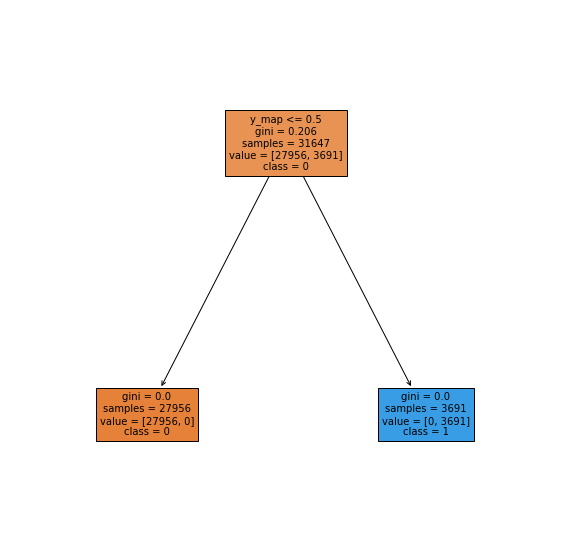

In [122]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(model1.best_estimator_,
               feature_names = X.columns.tolist(), 
               class_names=['0','1'],
               filled = True, max_depth=5, fontsize=10)
plt.show()

Text(0.5, 1.0, 'feature importance score')

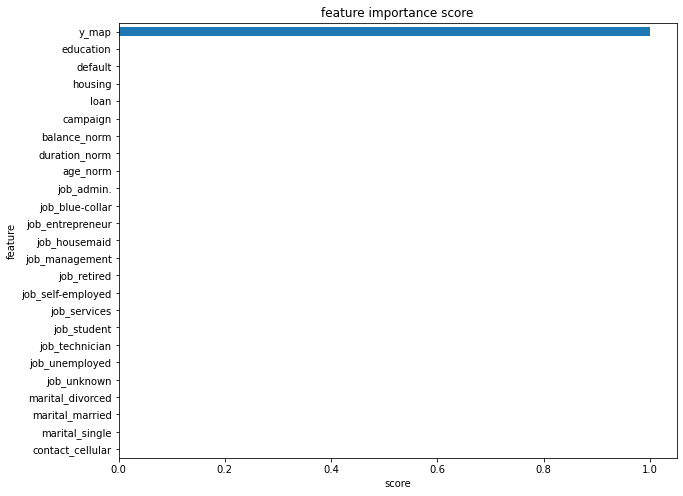

In [123]:
plt.figure(figsize=(10, 8))
feat_importances = pd.Series(model1.best_estimator_.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

### Outlier Dropped

In [124]:
from sklearn.tree import DecisionTreeClassifier
model1new = DecisionTreeClassifier(random_state = 42)
model1new.fit(Atrain, btrain)
b_pred = model1new.predict(Atest)
eval_classification1(model1new,Atrain,btrain,Atest,btest)

Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
AUC: 1.00


In [125]:
print('Train Score : ' + str(model1new.score(Atrain,btrain)))
print('Test Score : ' + str(model1new.score(Atest,btest)))

Train Score : 1.0
Test Score : 1.0


In [126]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model1new = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='precision')
model1new.fit(Atrain, btrain)

# Predict & Evaluation
b_pred = model1new.predict(Atest)#Check performa dari model
eval_classification1(model1new, Atrain, btrain, Atest, btest)

Accuracy (Test Set): 0.99
Precision (Test Set): 0.95
Recall (Test Set): 0.91
F1-Score (Test Set): 0.93
AUC: 0.97


In [127]:
print('Best max_depth:', model1new.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model1new.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model1new.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model1new.best_estimator_.get_params()['max_features'])
print('Best criterion:', model1new.best_estimator_.get_params()['criterion'])
print('Best splitter:', model1new.best_estimator_.get_params()['splitter'])

Best max_depth: 87
Best min_samples_split: 10
Best min_samples_leaf: 1
Best max_features: sqrt
Best criterion: gini
Best splitter: best


In [128]:
print('Train Score : ' + str(model1new.score(Atrain,btrain)))
print('Test Score : ' + str(model1new.score(Atest,btest)))

Train Score : 0.9935121107266436
Test Score : 0.9521331945889698


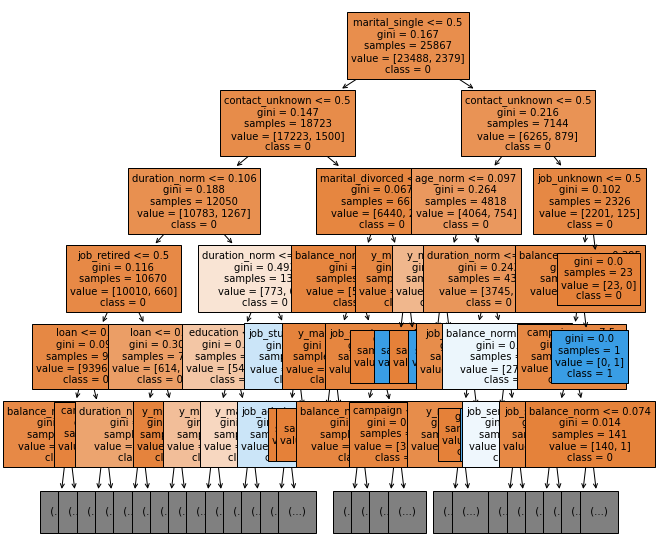

In [129]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(model1new.best_estimator_,
               feature_names = A.columns.tolist(), 
               class_names=['0','1'],
               filled = True, max_depth=5, fontsize=10)
plt.show()

Text(0.5, 1.0, 'feature importance score')

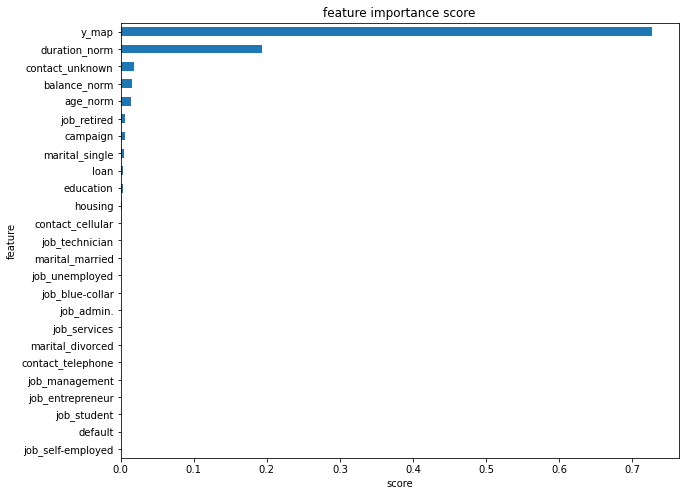

In [130]:
plt.figure(figsize=(10, 8))
feat_importances = pd.Series(model1new.best_estimator_.feature_importances_, index=A.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

# Feature Selection

<b> Skenario dihilangkan outlier <b>

In [137]:
dfn = dfi.drop(dfi.columns.difference(['y_map', 'duration_norm', 'contact_unknown', 'balance_norm', 'age_norm', 'job_retired', 'camapign', 'marital_single']),1, inplace=True)

C:\Users\User\AppData\Local\Temp/ipykernel_8660/2847959152.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfn = dfi.drop(dfi.columns.difference(['y_map', 'duration_norm', 'contact_unknown', 'balance_norm', 'age_norm', 'job_retired', 'camapign', 'marital_single']),1, inplace=True)


In [138]:
dfi.head()

,y_map,balance_norm,duration_norm,age_norm,job_retired,marital_single,contact_unknown
0,0,0.092259,0.053070,0.519481,0,0,1
1,0,0.073067,0.030704,0.337662,0,1,1
2,0,0.072822,0.015453,0.194805,0,0,1
3,0,0.086476,0.018707,0.376623,0,0,1
4,0,0.072812,0.040260,0.194805,0,1,1


In [139]:
A = dfi
b = dfi['y_map']

In [140]:
# Splitting data
from sklearn.model_selection import train_test_split
Atrain, Atest, btrain, btest = train_test_split(A,b,test_size=0.3, random_state = 42)

In [141]:
print(dfi.shape)
print(Atrain.shape)
print(Atest.shape)

(36954, 7)
(25867, 7)
(11087, 7)


### b) Modeling (Algoritma yang diimplementasikan tidak terbatas yang diajarkan di kelas)

### Dihilangkan Outlier

In [142]:
from sklearn.linear_model import LogisticRegression
modelnew = LogisticRegression(random_state = 42)
modelnew.fit(Atrain, btrain)

LogisticRegression(random_state=42)

In [143]:
b_predicted = modelnew.predict(Atest)
from sklearn.metrics import accuracy_score
print(accuracy_score (btest,b_predicted))

1.0


<b> Prediction Result

In [144]:
b_pred = modelnew.predict(Atest)
b_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [145]:
modelnew.predict_proba(Atest)

array([[9.99436293e-01, 5.63707433e-04],
       [9.99300482e-01, 6.99518354e-04],
       [9.99395176e-01, 6.04824315e-04],
       ...,
       [9.99425506e-01, 5.74494381e-04],
       [9.99396292e-01, 6.03708112e-04],
       [9.99280857e-01, 7.19142693e-04]])

In [146]:
b_pred_train = modelnew.predict(Atrain)
b_pred_train

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [147]:
b_pred_test = modelnew.predict(Atest)

### Evaluation

In [148]:
from sklearn.metrics import roc_auc_score
roc_auc_score(btest, b_pred)

1.0

In [149]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification1(modelnew, atrain, btrain, atest, btest):
    bpred = modelnew.predict(atest)
    print("Accuracy (Test Set): %.2f" % accuracy_score(btest, bpred))
    print("Precision (Test Set): %.2f" % precision_score(btest, bpred))
    print("Recall (Test Set): %.2f" % recall_score(btest, bpred))
    print("F1-Score (Test Set): %.2f" % f1_score(btest, bpred))
    
    b_pred_proba = modelnew.predict_proba(atest)
    print("AUC: %.2f" % roc_auc_score(btest, b_pred_proba[:, 1]))

In [150]:
eval_classification1(modelnew, Atrain, btrain, Atest, btest)

Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
AUC: 1.00


In [151]:
print("Precision (Train Set): %.2f" % precision_score(btrain, b_pred_train))

Precision (Train Set): 1.00


In [152]:
print('Train score: ' + str(modelnew.score(Atrain, btrain))) #accuracy
print('Test score:' + str(modelnew.score(Atest, btest))) #accuracy

Train score: 1.0
Test score:1.0


### Hyperparameter Tuning

In [153]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
hyperparameters = dict(penalty=penalty, C=C)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
modelnew = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='precision')

# Fitting Model & Evaluation
modelnew.fit(Atrain, btrain)
b_pred = modelnew.predict(Atest)
eval_classification1(modelnew, Atrain, btrain, Atest, btest)

D:\Python\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
D:\Python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavi

Accuracy (Test Set): 0.91
Precision (Test Set): 0.00
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
AUC: 1.00


D:\Python\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Python\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Python\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Python\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties,

In [154]:
b_pred_train = modelnew.predict(Atrain)
print("Precision (Train Set): %.2f" % precision_score(btrain, b_pred_train))

Precision (Train Set): 0.00


D:\Python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [155]:
print('Best penalty:', modelnew.best_estimator_.get_params()['penalty'])
print('Best C:', modelnew.best_estimator_.get_params()['C'])

Best penalty: l2
Best C: 0.0001


In [156]:
print('Train score: ' + str(modelnew.score(Atrain, btrain))) #accuracy
print('Test score:' + str(modelnew.score(Atest, btest))) #accuracy

Train score: 0.0
Test score:0.0


D:\Python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2.Feature Importance

<b> Fit & Predict <b>

In [157]:
from sklearn.tree import DecisionTreeClassifier
model1new = DecisionTreeClassifier(random_state = 42)
model1new.fit(Atrain, btrain)
b_pred = model1new.predict(Atest)
eval_classification1(model1new,Atrain,btrain,Atest,btest)

Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
AUC: 1.00


In [158]:
print('Train Score : ' + str(model1new.score(Atrain,btrain)))
print('Test Score : ' + str(model1new.score(Atest,btest)))

Train Score : 1.0
Test Score : 1.0


In [159]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model1new = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='precision')
model1new.fit(Atrain, btrain)

# Predict & Evaluation
b_pred = model1new.predict(Atest)#Check performa dari model
eval_classification1(model1new, Atrain, btrain, Atest, btest)

Accuracy (Test Set): 1.00
Precision (Test Set): 0.99
Recall (Test Set): 0.99
F1-Score (Test Set): 0.99
AUC: 0.99


In [160]:
print('Best max_depth:', model1new.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model1new.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model1new.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model1new.best_estimator_.get_params()['max_features'])
print('Best criterion:', model1new.best_estimator_.get_params()['criterion'])
print('Best splitter:', model1new.best_estimator_.get_params()['splitter'])

Best max_depth: 87
Best min_samples_split: 10
Best min_samples_leaf: 1
Best max_features: sqrt
Best criterion: gini
Best splitter: best


In [161]:
print('Train Score : ' + str(model1new.score(Atrain,btrain)))
print('Test Score : ' + str(model1new.score(Atest,btest)))

Train Score : 0.9974715549936789
Test Score : 0.9870388833499502


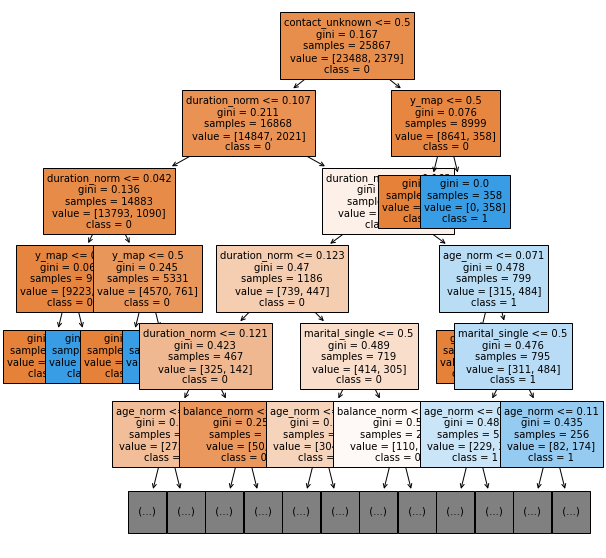

In [162]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(model1new.best_estimator_,
               feature_names = A.columns.tolist(), 
               class_names=['0','1'],
               filled = True, max_depth=5, fontsize=10)
plt.show()

Text(0.5, 1.0, 'feature importance score')

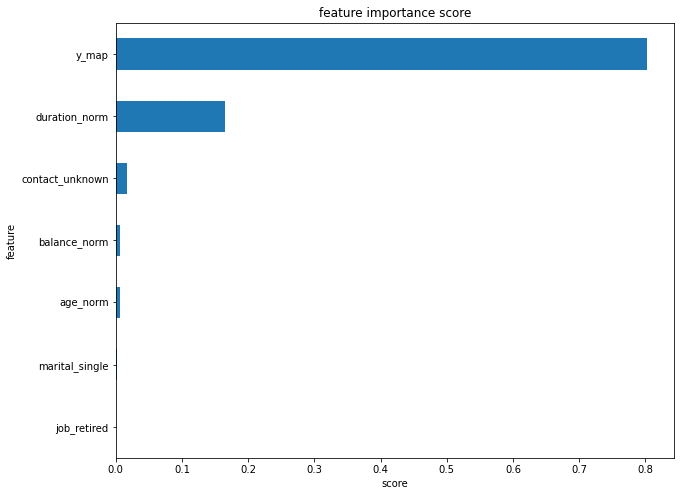

In [163]:
plt.figure(figsize=(10, 8))
feat_importances = pd.Series(model1new.best_estimator_.feature_importances_, index=A.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')